In [1]:
%run LRC_func.ipynb
#import pickle5 as pickle
colors[0]='k'

cvxpy not installed. Community.SteadyState() not available.


# Figure generator

# 221226 fig updates

## Fig. 4

In [186]:
Ss = [3]; Rs = [1, 3, 5, 10,20,30,50,75,100]; 
survs = load_obj('221128_survs_d02_merged');
growths = load_obj('221128_growths_d02_merged');
nsurvs={};
nsurvs2={};
arules={};
gpreds={};
thress=np.ones(len(Rs))*1e-4;#[1e-2, 1e-3, 1e-4, 1e-5, 1e-5];
#thress[0] = 5e-1;
for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=thress[j];
        surv = survs[(S,R)]; growth=growths[(S,R)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; growth=growth[filt];
        nsurvs[(S,R)]=[];
        nsurvs2[(S,R)]=[];
        arules[(S,R)]=[];
        gpreds[(S,R)]=[];
        nsurv = np.sum(surv[:,-1,:]>thres, axis=1);
        nsurv2 = np.sum(surv[:,:-1,:]>thres, axis=(1,2))/(surv.shape[1]-1)-1 ;
        nsurvs[(S,R)] += list(nsurv);
        nsurvs2[(S,R)] += list(nsurv2);
        arules[(S,R)] += list(arule_m(surv, thres=thres));
        gpreds[(S,R)] += list(pred_growth(surv, growth, thres=thres) );
        #print(max(nsurv))

In [187]:
arule_aves = np.zeros((len(Ss),len(Rs)));
nsurv_aves = np.zeros((len(Ss),len(Rs)));
npair_aves = np.zeros((len(Ss),len(Rs)));
gpreds_aves = np.zeros((len(Ss),len(Rs)));
arule_stds = np.zeros((len(Ss),len(Rs)));
nsurv_stds = np.zeros((len(Ss),len(Rs)));
npair_stds = np.zeros((len(Ss),len(Rs)));
gpreds_stds = np.zeros((len(Ss),len(Rs)));
lens = np.zeros((len(Ss),len(Rs)));
for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j];
        key = (S,R);
        arule_aves[i,j] = np.average(arules[key]);
        nsurv_aves[i,j] = np.average(nsurvs[key]);
        npair_aves[i,j] = np.average(nsurvs2[key]);
        gpreds_aves[i,j] = np.average(gpreds[key]);
        arule_stds[i,j] = np.std(np.array(arules[key]));
        nsurv_stds[i,j] = np.std(np.array(nsurvs[key]));
        npair_stds[i,j] = np.std(np.array(nsurvs2[key]));
        gpreds_stds[i,j] = np.std(np.array(gpreds[key]));
        lens[i,j] = len( arules[key] )

[[100. 100.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]]


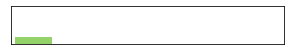

In [184]:
i=10;
surv = survs[(3,i)][filter_surv( survs[(3,i)] )];
#for i in Rs:
#    if(i!=1):
#        surv = np.concatenate([surv, survs[(3,i)][filter_surv( survs[(3,i)] )] ], axis=0)
outcome, viol = arule(surv, thres=thress[0]);
print(outcome)

fig, ax = plot_outcome3(outcome)
ax.set_yticks([0,250,500]);
ax.set_yticklabels(['','',''], fontsize=12);
ax.set_ylim(0,550);
#fig.set_size_inches(0.7, 0.7); ax.set_xlim(-0.6,0.5); ax.set_yticklabels([0,0.5,1.0], fontsize=12); ax.set_ylabel('Frequency', fontsize=12);
fig.set_size_inches(4.9, 0.7); ax.set_yticks([]); ax.set_ylabel('');
#fig.set_size_inches(0.7, 0.7); ax.set_xlim(4.4,5.5); ax.set_yticks([0,50,100]); ax.set_ylim(0,110); ax.set_yticks([]); ax.set_ylabel('');

#plt.gca().set_axis_off()
#fig.savefig('fig_v1/4c3.pdf', bbox_inches='tight')

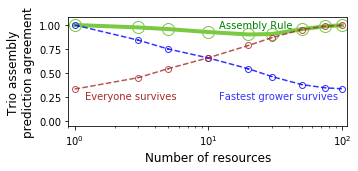

In [158]:
fig, ax = plt.subplots(figsize=(5,2))
ax.errorbar(Rs, arule_aves[0], yerr=arule_stds[0]/(500**0.5), marker='o', mfc='None', color='#7AC943', markersize=12, linewidth=4);
ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]/(500**0.5), marker='o', mfc='None', markersize=6, color='blue', linestyle='--', alpha=0.8);
ax.errorbar(Rs, nsurv_aves[0]/3, yerr=nsurv_stds[0]/(500**0.5)/3, marker='o', mfc='None', color='brown', markersize=6, linestyle='--', alpha=0.8);
ax.set_ylim(-0.05, 1.08)
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
ax.set_xticks([1,3,5,10,20,30,50,75,100]);
#ax.set_xlim(-1, 102)
#ax.text(19.,0.97,'Assembly Rule', color='green' )
#ax.text(28,0.55,'Fastest grower survives', color='blue', alpha=0.8)
#ax.text(2,0.35,'Everyone survives', color='brown' )
ax.set_xscale('log')
ax.set_xlim(0.9,110);
ax.text(12.,0.97,'Assembly Rule', color='green' )
ax.text(12,0.23,'Fastest grower survives', color='blue', alpha=0.8)
ax.text(1.2,0.23,'Everyone survives', color='brown' )
#ax.legend(['Assembly Rule','Fast grower wins'])
ax.set_xlabel('Number of resources', fontsize=12)
ax.set_ylabel('Trio assembly\nprediction agreement', fontsize=12)
#ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]);
#ax.set_xscale('log')
#fig.savefig('fig_v1/4e3.pdf', bbox_inches='tight')

## Fig. 5

### 5C. 

In [165]:
Ss = [3,5,7,10,12]; Rs = [1, 3, 5, 10,20,30,50,75,100]; fnames = ['221128_survs_d02_merged']

accu = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(S,R)]; #growth=growths[(S,R)];
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; #growth=growth[filt];
            surv = surv*(surv>thres)+thres*0.1;

            pred = arule_h(surv, repeat=True, method=0, thres=thres);
            accu[k,i,j] = 1-np.mean( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;

In [174]:
ax.imshow?

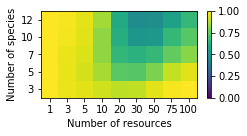

In [235]:
fig, ax = plt.subplots(figsize= (3.5,2))
panel = ax.imshow(accu[0],vmin=0, vmax=1)
ax.set_xticks(np.arange(len(Rs))); ax.set_xticklabels(Rs);
ax.set_yticks(np.arange(len(Ss))); ax.set_yticklabels(Ss);
ax.set_ylim(-0.5, len(Ss)-0.5);
#ax.set_xscale('log')
#ax.set_title('Survival prediction accuracy')
ax.set_xlabel('Number of resources');
ax.set_ylabel('Number of species');
fig.colorbar(panel, ax=ax, anchor=(0, 0.3), shrink=0.8)

#fig.savefig('fig_v1/5c.pdf', bbox_inches='tight')

### D. quant for expm

In [23]:
thres=1e-4; S=3;

In [24]:
data = pd.read_csv('expm_temp.txt',sep='\t')

In [25]:
ts = ['30C','25C','16C','11C']
survs_t = np.zeros((4,4,4,3));
survs_t_f = np.zeros((16,4,3));
for i in np.arange(4):
    for j in np.arange(4):
        data_p = data[(data['Trio']==i+1) & (data['Temp']==ts[j]) ];
        survs_t[i,j,3,0] = np.nanmean( data_p['Sp1_End'][:4] );
        survs_t[i,j,3,1] = np.nanmean( data_p['Sp2_End'][:4] );
        survs_t[i,j,3,2] = np.nanmean( data_p['Sp3_End'][:4] );
        survs_t[i,j,0,0] = np.nanmean( data_p['Sp1_End'][4:6] );
        survs_t[i,j,0,1] = np.nanmean( data_p['Sp2_End'][4:6] );
        survs_t[i,j,0,2] = np.nanmean( data_p['Sp3_End'][4:6] );
        survs_t[i,j,1,0] = np.nanmean( data_p['Sp1_End'][6:8] );
        survs_t[i,j,1,1] = np.nanmean( data_p['Sp2_End'][6:8] );
        survs_t[i,j,1,2] = np.nanmean( data_p['Sp3_End'][6:8] );
        survs_t[i,j,2,0] = np.nanmean( data_p['Sp1_End'][8:] );
        survs_t[i,j,2,1] = np.nanmean( data_p['Sp2_End'][8:] );
        survs_t[i,j,2,2] = np.nanmean( data_p['Sp3_End'][8:] );
        survs_t_f[i*4+j]=survs_t[i,j]
survs_t = survs_t/100;
survs_t_f = survs_t_f/100;

/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_36117/2027677969.py:13: RuntimeWarning: Mean of empty slice
  survs_t[i,j,1,0] = np.nanmean( data_p['Sp1_End'][6:8] );
/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_36117/2027677969.py:14: RuntimeWarning: Mean of empty slice
  survs_t[i,j,1,1] = np.nanmean( data_p['Sp2_End'][6:8] );
/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_36117/2027677969.py:15: RuntimeWarning: Mean of empty slice
  survs_t[i,j,1,2] = np.nanmean( data_p['Sp3_End'][6:8] );


In [52]:
data_trio = pd.read_csv('expm_d_trio.csv')
data_pair = pd.read_csv('expm_d_pair.csv')

In [53]:
ss = ['Ea','Pa','Pci','Pp','Pv'];
drs = [10,100,1000,10000,100000,1000000];
trios = [(0,1,2),(0,2,4),(0,3,2),(3,2,1),(3,2,4)];
survs_d = np.zeros((5,6,4,3));
survs_d_f = np.zeros((30,4,3));
for i in np.arange(5):
    for j in np.arange(6):
        trio = trios[i];
        data_p = data_trio[ (data_trio['DilutionRate']==drs[j]) & (data_trio['SpeciesA']==ss[trio[0]]) & (data_trio['SpeciesB']==ss[trio[1]]) & (data_trio['SpeciesC']==ss[trio[2]]) ];
        survs_d[i,j,3,0] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,3,1] = np.nanmean(data_p['Bfraction']);
        survs_d[i,j,3,2] = np.nanmean(data_p['Cfraction']);
        
        data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[0]]) & (data_pair['SpeciesB'] == ss[trio[1]])   ];
        survs_d[i,j,0,0] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,0,1] = np.nanmean(data_p['Bfraction']);
        if(len(data_p)==0): 
            data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[1]]) & (data_pair['SpeciesB'] == ss[trio[0]])   ];
            survs_d[i,j,0,1] = np.nanmean(data_p['Afraction']);
            survs_d[i,j,0,0] = np.nanmean(data_p['Bfraction']);
            
        data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) & (data_pair['SpeciesA']==ss[trio[2]]) & (data_pair['SpeciesB']==ss[trio[0]])];
        survs_d[i,j,1,2] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,1,0] = np.nanmean(data_p['Bfraction']);
        if(len(data_p)==0): 
            data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[0]]) & (data_pair['SpeciesB'] == ss[trio[2]])   ];
            survs_d[i,j,1,0] = np.nanmean(data_p['Afraction']);
            survs_d[i,j,1,2] = np.nanmean(data_p['Bfraction']);
            
        data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) & (data_pair['SpeciesA']==ss[trio[1]]) & (data_pair['SpeciesB']==ss[trio[2]])];
        survs_d[i,j,2,1] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,2,2] = np.nanmean(data_p['Bfraction']);
        if(len(data_p)==0): 
            data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[2]]) & (data_pair['SpeciesB'] == ss[trio[1]])   ];
            survs_d[i,j,2,2] = np.nanmean(data_p['Afraction']);
            survs_d[i,j,2,1] = np.nanmean(data_p['Bfraction']);
            
        survs_d_f[i*6+j] = survs_d[i,j];

/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_1286/2122618490.py:23: RuntimeWarning: Mean of empty slice
  survs_d[i,j,1,2] = np.nanmean(data_p['Afraction']);
/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_1286/2122618490.py:24: RuntimeWarning: Mean of empty slice
  survs_d[i,j,1,0] = np.nanmean(data_p['Bfraction']);
/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_1286/2122618490.py:31: RuntimeWarning: Mean of empty slice
  survs_d[i,j,2,1] = np.nanmean(data_p['Afraction']);
/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_1286/2122618490.py:32: RuntimeWarning: Mean of empty slice
  survs_d[i,j,2,2] = np.nanmean(data_p['Bfraction']);


In [57]:
thres=1e-4

/Users/jemma/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/jemma/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_1286/2530907975.py:57: RuntimeWarning: divide by zero encountered in true_divide
  pred[k,i] = 1/np.average(1/fracs0[k,i,ind]);


0.16965852487325195 0.10232574211238128 23 0.021336392159518526
0.08814724906179297 0.07290349788026207 69 0.008776549785251915


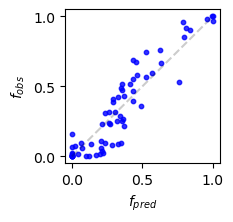

In [61]:
fig, ax = plt.subplots(figsize=(2.,2.));
surv = survs_d_f;
filt = filter_surv(surv, thres);
surv = surv[filt];
pred = arule_h(surv, repeat=True, method=1, thres=thres)
ax.scatter(pred[np.isnan(pred[:,0])==False],surv[np.isnan(pred[:,0])==False,-1], alpha=0.8, color='b', s=10);
stat = np.sum( (pred[np.isnan(pred[:,0])==False]-surv[np.isnan(pred[:,0])==False,-1])**2, axis=1)**0.5;
print(np.mean( stat ), np.std(stat), len(stat), np.std(stat)/(len(stat)**0.5) );
stat = ( (pred[np.isnan(pred[:,0])==False]-surv[np.isnan(pred[:,0])==False,-1]) ); stat=stat.reshape(-1); stat=np.abs(stat);
print(np.mean( stat ), np.std(stat), len(stat), np.std(stat)/(len(stat)**0.5) );
#surv = survs_t_f;
#filt = filter_surv(surv, thres);
#surv = surv[filt];
#pred = arule_h(surv, repeat=True, method=1, thres=thres)
#ax.scatter(pred[np.isnan(pred[:,0])==False], surv[np.isnan(pred[:,0])==False,-1], alpha=0.8, color='r', s=10);
#stat = np.sum( (pred[np.isnan(pred[:,0])==False]-surv[np.isnan(pred[:,0])==False,-1])**2, axis=1)**0.5;
#print(np.mean( stat ), np.std(stat), len(stat), np.std(stat)/(len(stat)**0.5));
#stat = np.abs( (pred[np.isnan(pred[:,0])==False]-surv[np.isnan(pred[:,0])==False,-1]) ); stat=stat.reshape(-1); stat=np.abs(stat);
#print(np.mean( stat ), np.std(stat), len(stat), np.std(stat)/(len(stat)**0.5) );
#surv = survs[(3,3)]; #growth=growths[(S,R)];
#filt = filter_surv(surv, thres);
#surv = surv[filt]; #growth=growth[filt];

#pred = arule_h(surv, repeat=True, method=0, thres=thres);
#inds = np.arange(100)*5;
#ax.scatter(pred[inds],surv[inds,-1], alpha=1, color='g', s=3);

#ax.text(0.55,0.1,'data from\nAbreu et al\n2019' )
ax.set_xlabel(r'$f_{pred}$'); ax.set_ylabel(r'$f_{obs}$');
#ax.legend(['Abreu et al 2019', 'Lax et al 2020'], bbox_to_anchor=(-0.2,0.35));
#ax.text(0.5,0.5,'Abreu et al 2019', color='r');
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--', alpha=0.2);
ax.set_yticks([0,0.5,1]); ax.set_yticklabels([0.0,0.5,1.0]);
fig.savefig('fig_v1/5d2.pdf', bbox_inches='tight');

### f

In [267]:
Ss = [3,5,7,10,12]; Rs = [1, 3, 5, 10,20,30,50,75,100]; fnames = ['221128_survs_d02_merged']



accu = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_bc = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q1 = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q2 = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q3 = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q3_std = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(S,R)]; #growth=growths[(S,R)];
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; #growth=growth[filt];
            surv = surv*(surv>thres)+thres*1e-3;

            pred = arule_h(surv, repeat=True, method=1, thres=thres);
            accu[k,i,j] = 1-np.mean( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;
            accu_q3[k,i,j] = np.mean( np.sum( (pred-surv[:,-1])**2, axis=1)**0.5 ); # L2 norm
            accu_q3_std[k,i,j] = np.std( np.sum( (pred-surv[:,-1])**2, axis=1)**0.5 ); # L2 norm
            

In [273]:
accu_q3[0,4,4]

0.4238686208603264

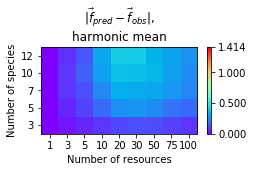

In [243]:
fig, ax = plt.subplots(figsize= (3.5,2));
s2 = np.log10(2**0.5);
#panel = ax.imshow((accu_q3[0]),vmin=0, vmax=0.4)
panel = ax.imshow((accu_q3[0]),vmin=0, vmax=2**0.5, cmap=plt.cm.rainbow)
ax.set_xticks(np.arange(len(Rs))); ax.set_xticklabels(Rs);
ax.set_yticks(np.arange(len(Ss))); ax.set_yticklabels(Ss);
ax.set_ylim(-0.5, len(Ss)-0.5);
ax.set_title(r'$|\vec{f}_{pred}-\vec{f}_{obs}|$'+',\nharmonic mean')
ax.set_xlabel('Number of resources');
ax.set_ylabel('Number of species');
fig.colorbar(panel, ax=ax, anchor=(0, 0.3), ticks=[0.0,0.5,1,2**0.5], shrink=0.8)

#fig.savefig('fig_v1/5em2.pdf', bbox_inches='tight')

## Fig. 6

### 6c

In [65]:
#survs = load_obj('210830_survs_cf_3sp_dumi')
#growths = load_obj('210830_growths_cf_3sp_dumi')
#survs = load_obj('220331_survs_cf_3sp')
#growths = load_obj('220331_growths_cf_3sp')
survs = load_obj('220406_survs_cf_3sp_dumi')
growths = load_obj('220406_growths_cf_3sp_dumi')
S=3;
#ls = [0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9]; # 0.95 has some missing data
#ps = [0, 0.2, 0.4, 0.6, 0.8, 1.];
#ls = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.8];
ps = [0.5];
ls = [0., 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5];
nsurvs={};
nsurvs2={};
arules={};
gpreds={};
thress=np.ones(len(ls))*5e-5;#[1e-2, 1e-3, 1e-4, 1e-5, 1e-5];
#thress[0] = 5e-1;
for i in np.arange(len(ps)):
    for j in np.arange(len(ls)):
        p = ps[i]; l = ls[j]; thres=thress[j];
        surv = survs[(S,p,l)]; growth=growths[(S,p,l)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; growth=growth[filt];
        nsurvs[(S,p,l)]=[];
        nsurvs2[(S,p,l)]=[];
        arules[(S,p,l)]=[];
        gpreds[(S,p,l)]=[];
        nsurv = np.sum(surv[:,-1,:]>thres, axis=1);
        nsurv2 = np.sum(surv[:,:-1,:]>thres, axis=(1,2))/(surv.shape[1]-1)-1 ;
        nsurvs[(S,p,l)] += list(nsurv);
        nsurvs2[(S,p,l)] += list(nsurv2);
        arules[(S,p,l)] += list(arule_m(surv, thres=thres));
        gpreds[(S,p,l)] += list(pred_growth(surv, growth, thres=thres) );
        #print(max(nsurv))

In [72]:
arule_aves = np.zeros((len(ls),len(ps)));
nsurv_aves = np.zeros((len(ls),len(ps)));
npair_aves = np.zeros((len(ls),len(ps)));
gpreds_aves = np.zeros((len(ls),len(ps)));
arule_stds = np.zeros((len(ls),len(ps)));
nsurv_stds = np.zeros((len(ls),len(ps)));
npair_stds = np.zeros((len(ls),len(ps)));
gpreds_stds = np.zeros((len(ls),len(ps)));
lens = np.zeros((len(ls),len(ps)));
for i in np.arange(len(ls)):
    for j in np.arange(len(ps)):
        l = ls[i]; p = ps[j];
        key = (S,p,l);
        arule_aves[i,j] = np.average(arules[key]);
        nsurv_aves[i,j] = np.average(nsurvs[key]);
        npair_aves[i,j] = np.average(nsurvs2[key]);
        gpreds_aves[i,j] = np.average(gpreds[key]);
        arule_stds[i,j] = np.std(np.array(arules[key]));
        nsurv_stds[i,j] = np.std(np.array(nsurvs[key]));
        npair_stds[i,j] = np.std(np.array(nsurvs2[key]));
        gpreds_stds[i,j] = np.std(np.array(gpreds[key]));
        lens[i,j] = len( arules[key] )

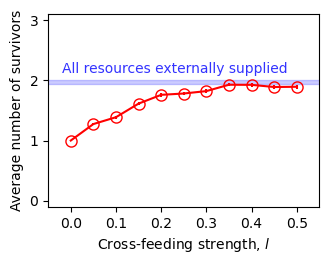

In [89]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
#ax.errorbar(Rs[:-2], nsurv_aves[0,:-2], yerr=nsurv_stds[0,:-2]);
ax.errorbar(np.array(ls), nsurv_aves[:,0], yerr=nsurv_stds[:,0]/(500**0.5), marker='o', mfc='None', markersize=8, color='red');
nocf = 1.976; nocferr = 0.6568287448033924;

#ax.errorbar(Rs[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
#ax.set_ylim(0.8, 3.2)
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
#ax.set_xticks([1,3,5,10,20,30,50]); ax.set_xlim(-2,53);
#ax.text(9.5,0.97,'Assembly Rule', color='#FF0000' )
#ax.legend(['Assembly Rule','Fast grower wins'])
ax.text(-0.02,nocf+0.15,'All resources externally supplied', color='blue', alpha=0.8);
#ax.legend(['$l=0$','$l=0.1$','$l=0.2$','$l=0.3$','$l=0.4$','$l=0.5$'], loc=(0.65,0.07));
ax.set_xlabel('Cross-feeding strength, $l$')
ax.set_ylabel('Average number of survivors')
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5]);
ax.set_xlim(-0.05,0.55);
ax.set_ylim(-0.1,3.1);
#ax.plot(np.linspace(-1,2,10), nocf+0*np.linspace(-1,2,10), color='blue', linestyle='--', alpha=0.8);
rec = matplotlib.patches.Rectangle( (-1, nocf-nocferr/(500**0.5)), 2, 2*nocferr/(500**0.5), color='blue', alpha=0.2 );
ax.add_artist(rec)

#ax.plot(Rs, Rs, 'k--')
#ax.text(3.1,2.6,' Competitive\n exclusion\n bound', color='k' )
#ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]);
#ax.set_xscale('log')
fig.savefig('fig_v1/6c.pdf', bbox_inches='tight')

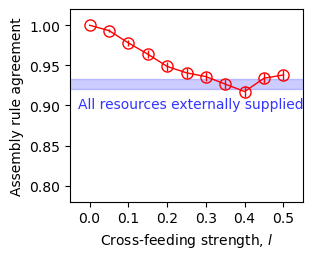

In [90]:
fig, ax = plt.subplots(figsize=(3.,2.5))
ax.errorbar(ls, arule_aves[:,0], yerr=arule_stds[:,0]/(500**0.5), marker='o', mfc='None', linewidth=1, markersize=8, color='r');
#ax.errorbar([1,3,5,10], nocf_ave[:4], yerr= nocf_std[:4], marker='^', mfc='None', markersize=8)
nocf = 0.9266666666666666; nocferr = 0.13808210118138647;
    #ax.errorbar(Ss[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
ax.set_ylim(0.78, 1.02)
#ax.set_xlim(0.45,1)
#ax.set_xscale('log')
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5]);
ax.set_xlim(-0.05,0.55)
ax.set_yticks([0.8, 0.85, 0.9,0.95,1])
#ax.set_xticklabels([3,5,7,10,20,50]);
#ax.legend(['$l=0$','$l=0.1$','$l=0.2$','$l=0.3$','$l=0.4$','$l=0.5$'], ncol=2);
ax.set_xlabel('Cross-feeding strength, $l$')
ax.set_ylabel('Assembly rule agreement')
#ax.plot(np.linspace(-1,2,10), nocf+0*np.linspace(-1,2,10), 'b--', alpha=0.8);
rec = matplotlib.patches.Rectangle( (-1, nocf-nocferr/(500**0.5)), 2, 2*nocferr/(500**0.5), color='blue', alpha=0.2 );
ax.add_artist(rec)
ax.text(-0.03,nocf-0.03,'All resources externally supplied', color='b', alpha=0.8);

fig.savefig('fig_v1/6d.pdf', bbox_inches='tight')

### 6e

In [95]:
survs.keys()

dict_keys([(3, 0, 0.0), (3, 0, 0.2), (3, 0, 0.4), (3, 0, 0.8), (3, 0.2, 0.0), (3, 0.2, 0.2), (3, 0.2, 0.4), (3, 0.2, 0.8), (3, 0.4, 0.0), (3, 0.4, 0.2), (3, 0.4, 0.4), (3, 0.4, 0.8), (3, 0.6, 0.0), (3, 0.6, 0.2), (3, 0.6, 0.4), (3, 0.6, 0.8), (3, 0.8, 0.0), (3, 0.8, 0.2), (3, 0.8, 0.4), (3, 0.8, 0.8), (3, 1.0, 0.0), (3, 1.0, 0.2), (3, 1.0, 0.4), (3, 1.0, 0.8), (3, 0, 0.1), (3, 0, 0.3), (3, 0, 0.5), (3, 0.2, 0.1), (3, 0.2, 0.3), (3, 0.2, 0.5), (3, 0.4, 0.1), (3, 0.4, 0.3), (3, 0.4, 0.5), (3, 0.6, 0.1), (3, 0.6, 0.3), (3, 0.6, 0.5), (3, 0.8, 0.1), (3, 0.8, 0.3), (3, 0.8, 0.5), (3, 1.0, 0.1), (3, 1.0, 0.3), (3, 1.0, 0.5)])

In [98]:
#survs = load_obj('210830_survs_cf_3sp_dumi')
#growths = load_obj('210830_growths_cf_3sp_dumi')
survs = load_obj('220331_survs_cf_3sp')
growths = load_obj('220331_growths_cf_3sp')
#survs = load_obj('220406_survs_cf_3sp_dumi')
#growths = load_obj('220406_growths_cf_3sp_dumi')
S=3;
#ls = [0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9]; # 0.95 has some missing data
ps = [0, 0.2, 0.4, 0.6, 0.8, 1.];
ls = [0., 0.1, 0.3,0.5];
#ps = [0.5];
#ls = [0., 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5];
nsurvs={};
nsurvs2={};
arules={};
gpreds={};
thress=np.ones(len(ls))*5e-5;#[1e-2, 1e-3, 1e-4, 1e-5, 1e-5];
#thress[0] = 5e-1;
for i in np.arange(len(ps)):
    for j in np.arange(len(ls)):
        p = ps[i]; l = ls[j]; thres=thress[j];
        surv = survs[(S,p,l)]; growth=growths[(S,p,l)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; growth=growth[filt];
        nsurvs[(S,p,l)]=[];
        nsurvs2[(S,p,l)]=[];
        arules[(S,p,l)]=[];
        gpreds[(S,p,l)]=[];
        nsurv = np.sum(surv[:,-1,:]>thres, axis=1);
        nsurv2 = np.sum(surv[:,:-1,:]>thres, axis=(1,2))/(surv.shape[1]-1)-1 ;
        nsurvs[(S,p,l)] += list(nsurv);
        nsurvs2[(S,p,l)] += list(nsurv2);
        arules[(S,p,l)] += list(arule_m(surv, thres=thres));
        gpreds[(S,p,l)] += list(pred_growth(surv, growth, thres=thres) );
        #print(max(nsurv))

In [101]:
fnames = ['220331_survs_cf_3sp']

Ss = [0, 0.2, 0.4, 0.6, 0.8, 1.];
Rs = [0., 0.1, 0.3,0.5];
accu = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(3,S,R)]; #growth=growths[(S,R)];
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; #growth=growth[filt];
            surv = surv*(surv>thres)+thres*0.1;

            pred = arule_h(surv, repeat=True, method=0, thres=thres);
            accu[k,i,j] = 1-np.mean( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;

/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_1286/3931101286.py:18: RuntimeWarning: invalid value encountered in double_scalars
  accu[k,i,j] = 1-np.mean( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;


In [106]:
accu

array([[[       nan,        nan,        nan,        nan],
        [1.        , 0.83      , 0.58      , 0.61923848],
        [1.        , 0.895     , 0.565     , 0.485     ],
        [1.        , 0.88666667, 0.66666667, 0.63666667],
        [1.        , 0.7925    , 0.7175    , 0.7425    ],
        [1.        , 0.788     , 0.78      , 0.822     ]]])

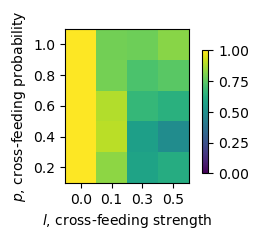

In [104]:
fig, ax = plt.subplots(figsize= (3.5,2))
panel = ax.imshow(accu[0],vmin=0, vmax=1)
ax.set_xticks(np.arange(len(Rs))); ax.set_xticklabels(Rs);
ax.set_yticks(np.arange(len(Ss))); ax.set_yticklabels(Ss);
ax.set_ylim(0.5, len(Ss)-0.5);
#ax.set_xscale('log')
#ax.set_title('Survival prediction accuracy')
ax.set_xlabel(r'$l$, cross-feeding strength');
ax.set_ylabel(r'$p$, cross-feeding probability');
fig.colorbar(panel, ax=ax, anchor=(0, 0.3), shrink=0.8)

#fig.savefig('fig_v1/5c.pdf', bbox_inches='tight')

## SI

### cross-feeding

In [274]:
## Simulation set 7: crossfeeding #2
Ss=[3,5,7,10]; Rs=[3,5,10]; fnames = ['221001_survs_d02_merged','221229_survs_d02_cf','221217_survs_d02_cf2'];
accu = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_bc = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q1 = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q2 = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q3 = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(S,R)]; #growth=growths[(S,R)];
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; #growth=growth[filt];
            surv = surv*(surv>thres)+thres*0.1;

            pred = arule_h(surv, repeat=True, method=0, thres=thres);
            accu[k,i,j] = 1-np.median( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;
            accu_bc[k,i,j] = 1-np.median( 2*np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1)/(np.sum( pred>thres, axis=1)+np.sum( surv[:,-1]>thres, axis=1))  );
            accu_q1[k,i,j] = np.median( ( np.sum( np.min([pred,surv[:,-1]], axis=0), axis=1) ) ); # community overlap
            #accu_q2[k,i,j] = np.median( np.average( np.abs(pred-surv[:,-1]), axis=1) ); # average difference in fraction
            accu_q3[k,i,j] = np.median( np.sum( (pred-surv[:,-1])**2, axis=1)/2 ); # L2 norm
            

(-0.05, 1.05)

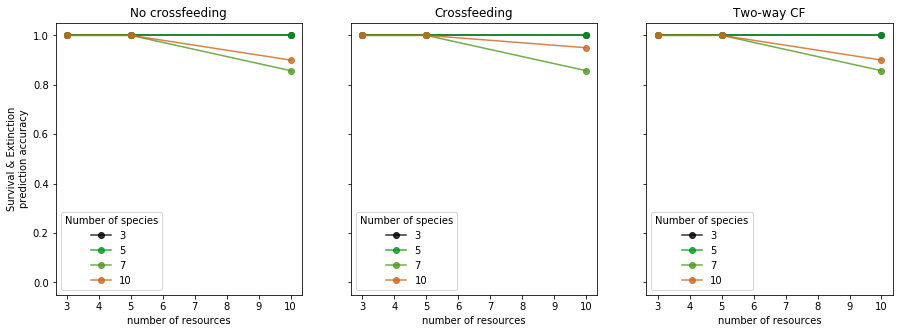

In [275]:
plot=(0,1);

fig, ax = plt.subplots( 1, len(fnames), figsize=(5*len(fnames),5), sharey=True);

mks = ['o','s','*']
if(plot[0]==0): # qualitative, Rs
    data = accu;
    ax[0].set_ylabel('Survival & Extinction\nprediction accuracy')
    #ax[k].set_ylabel('1-BC');
elif(plot[0]==1):
    data = accu_q1;
    ax[0].set_ylabel('Total fraction overlap in each community');
elif(plot[0]==2):
    data = accu_q2;
    ax[0].set_ylabel('Average fraction deviation for each species');
elif(plot[0]==3):
    data = accu_q3;
    ax[0].set_ylabel('L2 norm deviation for each community');
if(plot[1]==0):
    xmax = len(Rs);
    for k in np.arange(len(fnames)):
        ax[k].set_xlabel('number of species');
else:
    xmax = len(Ss);
    for k in np.arange(len(fnames)):
        ax[k].set_xlabel('number of resources');
titles = ['No crossfeeding', 'Crossfeeding','Two-way CF']
for k in np.arange(len(fnames)):
    ax[k].set_title(titles[k])

for k in np.arange(len(fnames)):
    for i in np.arange(xmax):
        if(plot[1] == 0):
            ax[k].plot(Ss, data[k,:,i], color=colors[i], marker='o', alpha=0.8);
            ax[k].legend(Rs, title='Number of resources');
        else:
            ax[k].plot(Rs, data[k,i], color=colors[i], marker='o', alpha=0.8);
            ax[k].legend(Ss, title='Number of species');
ax[k].set_ylim(-0.05,1.05)

# Status (221129)

In [244]:
Ss = [3,5,7,10];
Rs = [1, 3, 5, 10];
#Ss=[3];
#Rs=[3];
## Simulation set 1: different models
fnames = ['221001_survs_d02_merged','221001_survs_d02_Monod_K(1,0.2)_merged','221001_survs_d02_LLM_K(1,0.2)']; 
## Simulation set 2: shuffled R_ij with tradeoff \sum_j R_ij =1, Gaussian(1,0.2) K_ij
#fnames = ['221004_survs_d02','221004_survs_d02_Monod_K(1,0.2)','221004_survs_d02_LLM_K(1,0.2)'] 
## Simulation set 3: shuffled R_ij with tradeoff \sum_j R_ij^2 =1, Gaussian(1,0.2) K_ij
#fnames = ['221005_survs_d02','221005_survs_d02_Monod_K(1,0.2)','221005_survs_d02_LLM_K(1,0.2)'] 
## Simulation set 4: tradeoffs
#Ss = [3,5,7,10]; Rs = [1, 3, 5, 10];fnames = ['221001_survs_d02_merged','221004_survs_d02','221005_survs_d02'] 
## Simulation set 5: Gaussian / Exponential R_ij
#Ss=[3]; Rs=[1,3,5,10,20,50]; fnames = ['221001_survs_d02_merged','221217_survs_d02_gaussian','221217_survs_d02_exponential'];
## Simulation set 6: Specialist/generalist
#Ss=[3]; Rs=[1,3,5,10,20,50]; fnames = ['221001_survs_d02_merged','221217_survs_d02_p050','221217_survs_d02_p000'];
## Simulation set 7: crossfeeding #2
#Ss=[3,5,7,10]; Rs=[3,5,10]; fnames = ['221001_survs_d02_merged','221217_survs_d02_cf','221217_survs_d02_cf2'];
#fnames = ['221001_survs_d02_merged']#,'221217_survs_d02_cf']#,'221217_survs_d02_cf2'];
## Simulation set 8: 10x dilution
#Ss=[3,5,7,10]; Rs=[3,5,10]; fnames = ['221128_survs_d02_merged','210514_survs_merged'];
## Simulation set 9: original. Note that 10 species - 100 resources case has 310 simulations, not 500.
#Ss = [3,5,7,10,12]; Rs = [1, 3, 5, 10,20,30,50,75,100]; fnames = ['221128_survs_d02_merged']



accu = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_bc = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q1 = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q2 = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q3 = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(S,R)]; #growth=growths[(S,R)];
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; #growth=growth[filt];
            surv = surv*(surv>thres)+thres*0.1;

            pred = arule_h(surv, repeat=True, method=0, thres=thres);
            accu[k,i,j] = 1-np.average( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;
            accu_bc[k,i,j] = 1-np.average( 2*np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1)/(np.sum( pred>thres, axis=1)+np.sum( surv[:,-1]>thres, axis=1))  );
            accu_q1[k,i,j] = np.median( ( np.sum( np.min([pred,surv[:,-1]], axis=0), axis=1) ) ); # community overlap
            #accu_q2[k,i,j] = np.median( np.average( np.abs(pred-surv[:,-1]), axis=1) ); # average difference in fraction
            accu_q3[k,i,j] = np.median( np.sum( (pred-surv[:,-1])**2, axis=1)/2 ); # L2 norm
            

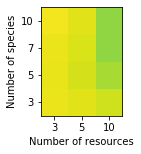

In [16]:
fig, ax = plt.subplots(figsize= (3.5,2))
panel = ax.imshow(accu[0],vmin=0, vmax=1)
ax.set_xticks(np.arange(len(Rs))); ax.set_xticklabels(Rs);
ax.set_yticks(np.arange(len(Ss))); ax.set_yticklabels(Ss);
ax.set_ylim(-0.5, len(Ss)-0.5);
#ax.set_title('Survival prediction accuracy')
ax.set_xlabel('Number of resources');
ax.set_ylabel('Number of species');
#fig.colorbar(panel, ax=ax, anchor=(0, 0.3), shrink=1)

#fig.savefig('fig_v1/6f1.pdf', bbox_inches='tight')

(-0.05, 1.05)

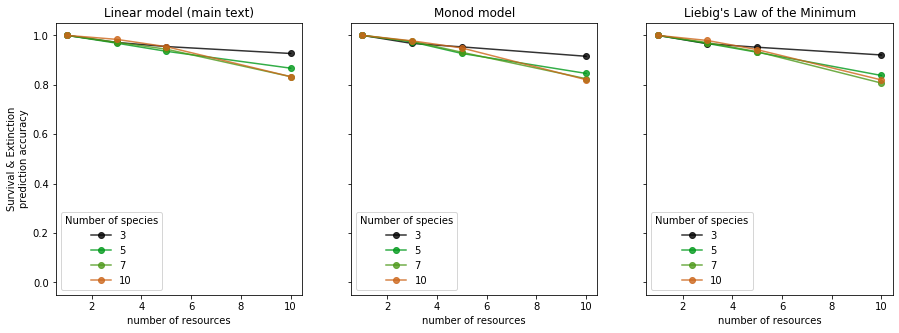

In [246]:
plot=(0,1);

fig, ax = plt.subplots( 1, len(fnames), figsize=(5*len(fnames),5), sharey=True);

mks = ['o','s','*']
if(plot[0]==0): # qualitative, Rs
    data = accu;
    ax[0].set_ylabel('Survival & Extinction\nprediction accuracy')
    #ax[k].set_ylabel('1-BC');
elif(plot[0]==1):
    data = accu_q1;
    ax[0].set_ylabel('Total fraction overlap in each community');
elif(plot[0]==2):
    data = accu_q2;
    ax[0].set_ylabel('Average fraction deviation for each species');
elif(plot[0]==3):
    data = accu_q3;
    ax[0].set_ylabel('L2 norm deviation for each community');
if(plot[1]==0):
    xmax = len(Rs);
    for k in np.arange(len(fnames)):
        ax[k].set_xlabel('number of species');
#        ax[k].set_title('{} Resources'.format(Rs) );
else:
    xmax = len(Ss);
    for k in np.arange(len(fnames)):
        ax[k].set_xlabel('number of resources');
#ax[k].set_title('{} Species'.format(Ss) );


titles = ['Linear model (main text)', 'Monod model', 'Liebig\'s Law of the Minimum']
#titles = ['No tradeoff', '$\sum_{i}r_{\mu i}=1$', '$\sum_{i}r_{\mu i}^2=1$']
#titles = ['Uniform', 'Gaussian', 'Exponential']
#titles = ['Generalist', 'Intermediate', 'Specialist']
#titles = ['No crossfeeding', 'Crossfeeding','Two-way CF']
#titles = [r'original ($\delta=0.02$)', '$\delta=0.2$']
for k in np.arange(len(fnames)):
    ax[k].set_title(titles[k])

for k in np.arange(len(fnames)):
    for i in np.arange(xmax):
        if(plot[1] == 0):
            ax[k].plot(Ss, data[k,:,i], color=colors[i], marker='o', alpha=0.8);
            ax[k].legend(Rs, title='Number of resources');
        else:
            ax[k].plot(Rs, data[k,i], color=colors[i], marker='o', alpha=0.8);
            ax[k].legend(Ss, title='Number of species');
#ax[k].legend(['No tradeoff','linear','quadratic'])
#ax[k].legend(['linear','Monod','LLM']);
#ax[k].legend(['generalist','intermediate','specialist']);
#ax[k].legend(['uniform','gaussian','exponential']);
ax[k].set_ylim(-0.05,1.05)
#ax[k].set_xlabel('number of species');
#ax[k].set_title('{} Resources'.format(Rs) );

## Compare between model

In [92]:
Ss = [3, 5, 7];
Rs = [1,2,3,5];#[1, 3, 5, 7, 10];
#Ss=[3];
#Rs=[3];
## Simulation set 1: shuffled R_ij, Gaussian(1,0.2) K_ij
#fnames = ['221001_survs_d02_merged','221001_survs_d02_Monod_K(1,0.2)_merged','221001_survs_d02_LLM_K(1,0.2)']; 
## Simulation set 2: shuffled R_ij with tradeoff \sum_j R_ij =1, Gaussian(1,0.2) K_ij
#fnames = ['221004_survs_d02','221004_survs_d02_Monod_K(1,0.2)','221004_survs_d02_LLM_K(1,0.2)'] 
## Simulation set 3: shuffled R_ij with tradeoff \sum_j R_ij^2 =1, Gaussian(1,0.2) K_ij
#fnames = ['221005_survs_d02','221005_survs_d02_Monod_K(1,0.2)','221005_survs_d02_LLM_K(1,0.2)'] 
fnames = ['221001_survs_d02_merged','221001_survs_d02_Monod_K(1,0.2)_merged','221010_survs_d02_LLM_K(1,0.2)'];
accu = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_bc = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q1 = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q2 = np.zeros((len(fnames),len(Ss),len(Rs)));
accu_q3 = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(S,R)]; #growth=growths[(S,R)];
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; #growth=growth[filt];
            surv = surv*(surv>thres)+thres*0.1;

            pred = arule_h(surv, repeat=True, method=0, thres=thres);
            accu[k,i,j] = 1-np.average( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;
            accu_bc[k,i,j] = 1-np.average( 2*np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1)/(np.sum( pred>thres, axis=1)+np.sum( surv[:,-1]>thres, axis=1))  );
            accu_q1[k,i,j] = np.median( ( np.sum( np.min([pred,surv[:,-1]], axis=0), axis=1) ) ); # community overlap
            accu_q2[k,i,j] = np.median( np.average( np.abs(pred-surv[:,-1]), axis=1) ); # average difference in fraction
            accu_q3[k,i,j] = np.median( np.sum( (pred-surv[:,-1])**2, axis=1)/2 ); # L2 norm
            

C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


(-0.05, 1.05)

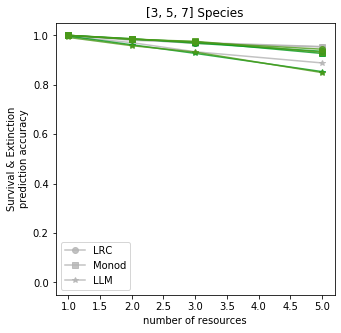

In [98]:
plot=(0,1);

fig, ax = plt.subplots(figsize=(5,5));
mks = ['o','s','*']
if(plot[0]==0): # qualitative, Rs
    data = accu;
    ax.set_ylabel('Survival & Extinction\nprediction accuracy')
    #ax.set_ylabel('1-BC');
elif(plot[0]==1):
    data = accu_q1;
    ax.set_ylabel('Total fraction overlap in each community');
elif(plot[0]==2):
    data = accu_q2;
    ax.set_ylabel('Average fraction deviation for each species');
elif(plot[0]==3):
    data = accu_q3;
    ax.set_ylabel('L2 norm deviation for each community');
if(plot[1]==0):
    xmax = len(Rs);
    ax.set_xlabel('number of species');
    ax.set_title('{} Resources'.format(Rs) );
else:
    xmax = len(Ss);
    ax.set_xlabel('number of resources');
    ax.set_title('{} Species'.format(Ss) );
for i in np.arange(xmax):
    for k in np.arange(len(fnames)):
        if(plot[1] == 0):
            ax.plot(Ss, data[k,:,i], color=colors[i], marker=mks[k], alpha=0.8);
        else:
            ax.plot(Rs, data[k,i], color=colors[i], marker=mks[k], alpha=0.8);
#ax.legend(['No tradeoff','linear','quadratic'])
ax.legend(['LRC','Monod','LLM']);
ax.set_ylim(-0.05,1.05)
#ax.set_xlabel('number of species');
#ax.set_title('{} Resources'.format(Rs) );

KeyError: (3, 1)

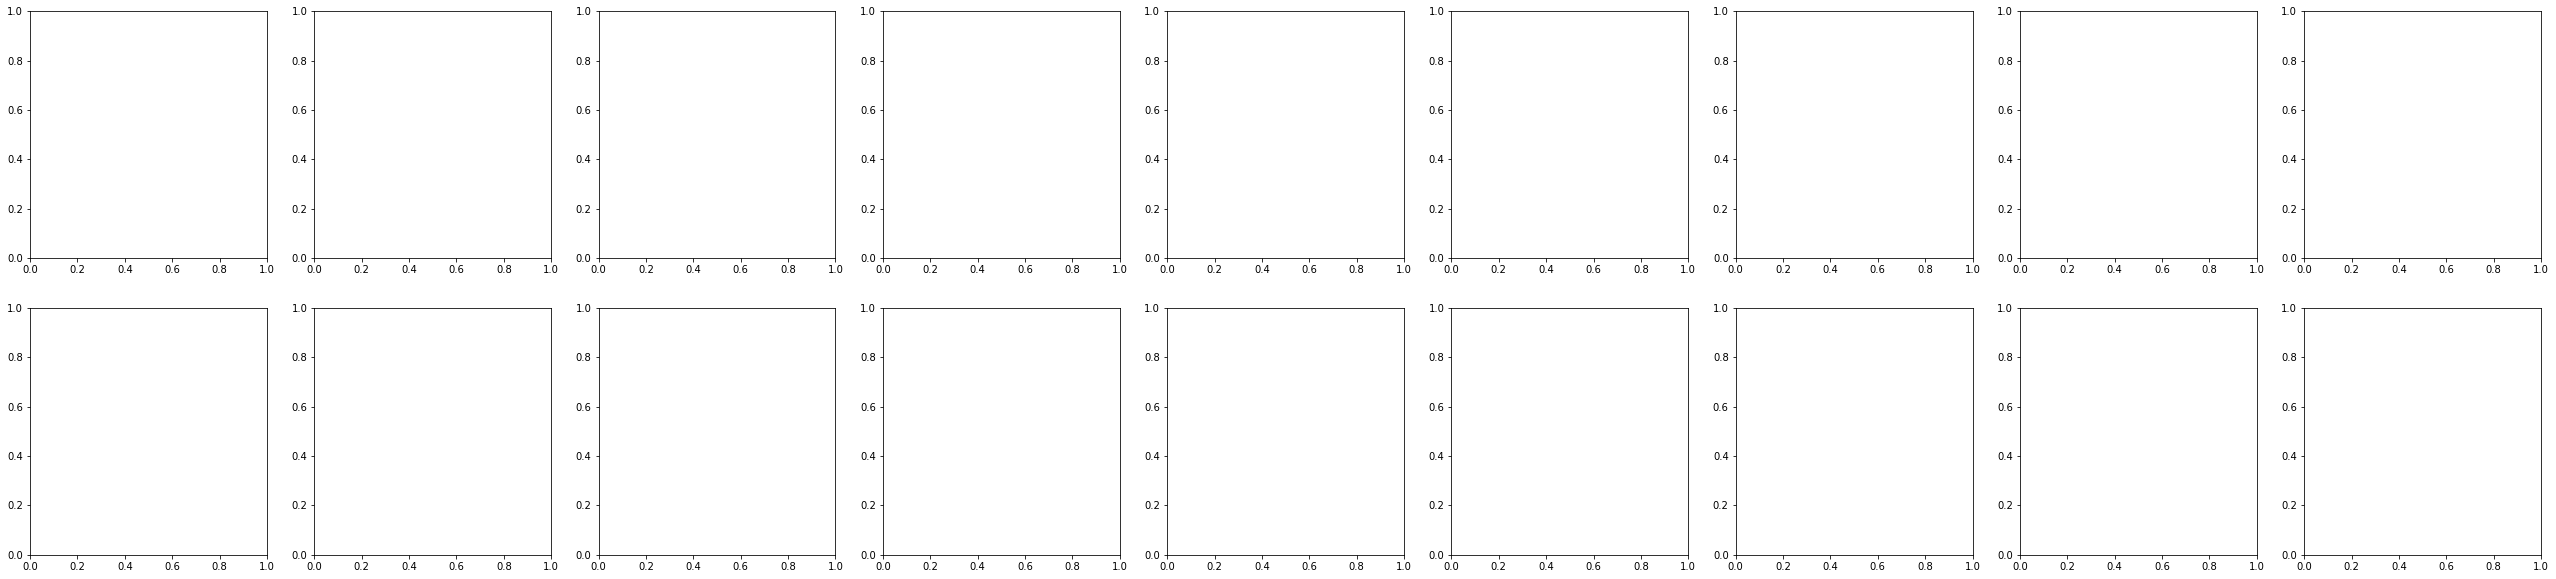

In [17]:
Ss=[3,3];
fig, ax = plt.subplots(len(Ss),len(Rs), figsize=(5*len(Rs),5*len(Ss)));
for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
                S = Ss[i]; R = Rs[j]; thres=1e-4;
                surv = survs[(S,R)]; #growth=growths[(S,R)];
                filt = filter_surv(surv, thres);
                surv = surv[filt]; #growth=growth[filt];

                #pred = arule_h(surv, repeat=False, thres=thres)
                pred = arule_h(surv, repeat=False, method=[0,4][i], thres=thres)
                #ax[i,j].scatter(pred,surv[:,-1], alpha=0.03, color=(1-j/(len(Rs)-1),0.3,j/(len(Rs)-1)))
                ax[i,j].scatter(pred,surv[:,-1], alpha=0.5/S, color=(k//2, k%2, 1-k//2));
                ax[i,j].text(0,1,'{} species, {} resource'.format(S,R) )
                ax[i,j].plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--', alpha=0.01)

[[  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [500. 500.   0.   0.]]


Text(0.5, 1.0, '1 Resources')

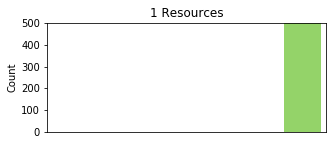

In [48]:
i=0;
th=1e-4;
surv = survs[(3,Rs[i])][filter_surv( survs[(3,Rs[i])], thres=th )];
#growth = growths[(3,Rs[i])][filter_surv( survs[(3,Rs[i])] , thres=th)];
#for i in Rs:
#    if(i!=1):
#        surv = np.concatenate([surv, survs[(3,i)][filter_surv( survs[(3,i)] )] ], axis=0)
outcome, viol = arule(surv, thres=th);
print(outcome)

fig, ax = plot_outcome3(outcome)
fig.set_size_inches(5, 2);
ax.set_ylim(0,500);
ax.set_yticks([0,100,200,300,400,500]);
#ax.set_yticklabels([0,10,20,30])
ax.set_ylabel('Count')
ax.set_title('{} Resources'.format(Rs[i]))
#plt.gca().set_axis_off()
#fig.savefig('fig_v1/3b.pdf', bbox_inches='tight')

## Harmonic rule analysis

In [2]:
survs = load_obj('221128_survs_d02_merged') #default
#growths = load_obj('2210_growths_d02_merged') #default

#survs = load_obj('221001_survs_d02') #Monod(type II), K=1
#growths = load_obj('221001_growths_d02') #Monod(type II), K=1

#survs = load_obj('221001_survs_d02_LLM') #LLM, K=1
#growths = load_obj('221001_growths_d02_LLM') #LLM, K=1

#survs = load_obj('210514_survs_merged') #tau=5 instead of tau=50
#growths = load_obj('210514_growths_merged') #tau=5 instead of tau=50


Ss = [3,5,7,10,12]#[3, 5, 7, 10];
Rs = [1,3,5,10,20,30,50,100]#[1, 3, 5, 7, 10];

nsurvs={};
nsurvs2={};
arules={};
gpreds={};
nocrosss={};
thress=np.ones(8)*1e-4;#[1e-2, 1e-3, 1e-4, 1e-5, 1e-5];
#thress[0] = 5e-1;
for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=thress[j];
        surv = survs[(S,R)]; #growth=growths[(S,R)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; #growth=growth[filt];
        nsurvs[(S,R)]=[];
        nsurvs2[(S,R)]=[];
        arules[(S,R)]=[];
        gpreds[(S,R)]=[];
        #nocrosss[(S,R)]=[];
        nsurv = np.sum(surv[:,-1,:]>thres, axis=1);
        nsurv2 = np.sum(surv[:,:-1,:]>thres, axis=(1,2))/(surv.shape[1]-1)-1 ;
        #nocross = np.zeros(growth.shape[0])
        #for k in np.arange(growth.shape[0]):
        #    nocross[k] = np.all(growth[k,0]>growth[k,1])+np.all(growth[k,0]<growth[k,1])+np.all(growth[k,0]>growth[k,2])+np.all(growth[k,0]<growth[k,2])+np.all(growth[k,1]>growth[k,2])+np.all(growth[k,1]<growth[k,2])>0;
        nsurvs[(S,R)] += list(nsurv);
        nsurvs2[(S,R)] += list(nsurv2);
        arules[(S,R)] += list(arule_m(surv, thres=thres));
        #gpreds[(S,R)] += list(pred_growth(surv, growth, thres=thres) );
        #nocrosss[(S,R)] += list(nocross);
        #print(max(nsurv))

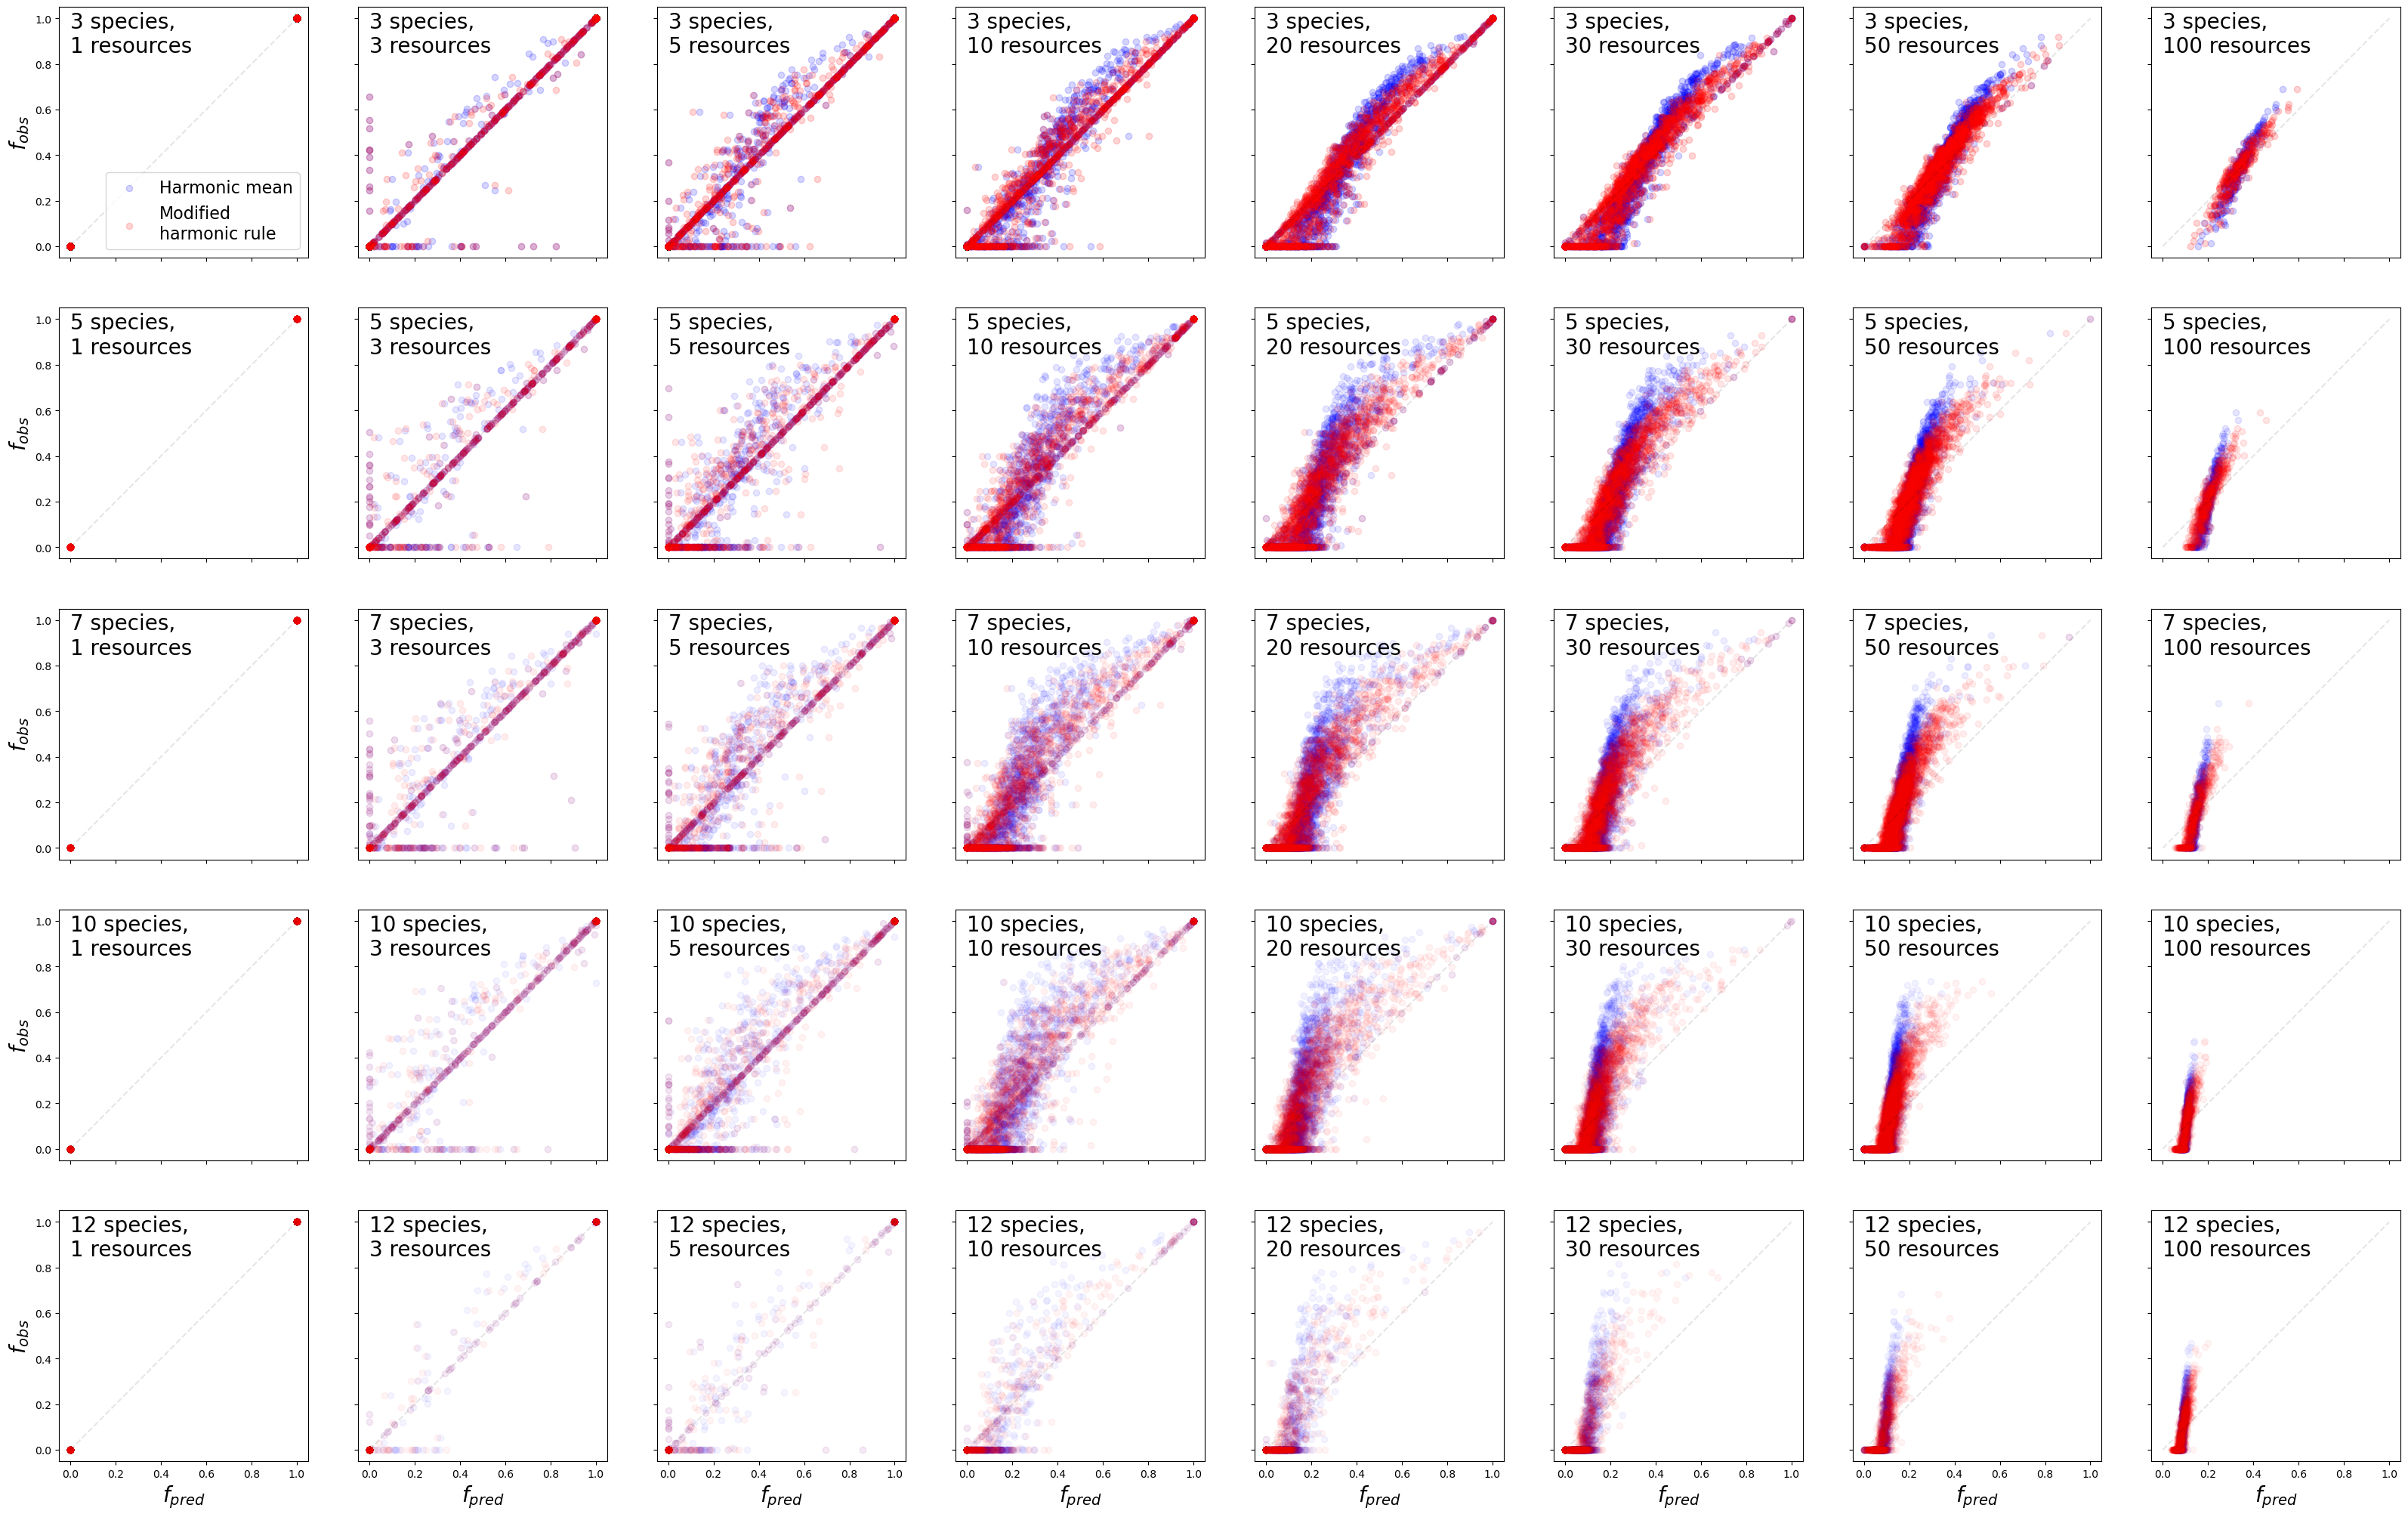

In [3]:
fig, ax = plt.subplots(len(Ss),len(Rs), sharex=True, sharey=True, figsize=(5*len(Rs),5*len(Ss)));
for i in np.arange(len(Ss)):
    ax[i,0].set_ylabel(r'$f_{obs}$', fontsize=20)
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=1e-4;
        surv = survs[(S,R)]; #growth=growths[(S,R)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; #growth=growth[filt];
        
        #pred = arule_h(surv, repeat=False, thres=thres)
        pred = arule_h(surv, repeat=True, method=1, thres=thres);
        l1 = ax[i,j].scatter(pred,surv[:,-1], alpha=0.5/S, color='b');
        pred = arule_h(surv, repeat=True, method=0, thres=thres);
        l2 = ax[i,j].scatter(pred,surv[:,-1], alpha=0.5/S, color='r');
        ax[i,j].text(0,0.85,'{} species,\n{} resources'.format(S,R), fontsize=20 );
        ax[i,j].plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--', alpha=0.1, zorder=1);
        if(i==len(Ss)-1):
            ax[i,j].set_xlabel(r'$f_{pred}$', fontsize=20)
        if( i==0 and j==0 ):
            ax[i,j].legend([l1,l2],['Harmonic mean','Modified\nharmonic rule'], loc='lower right', fontsize=16);

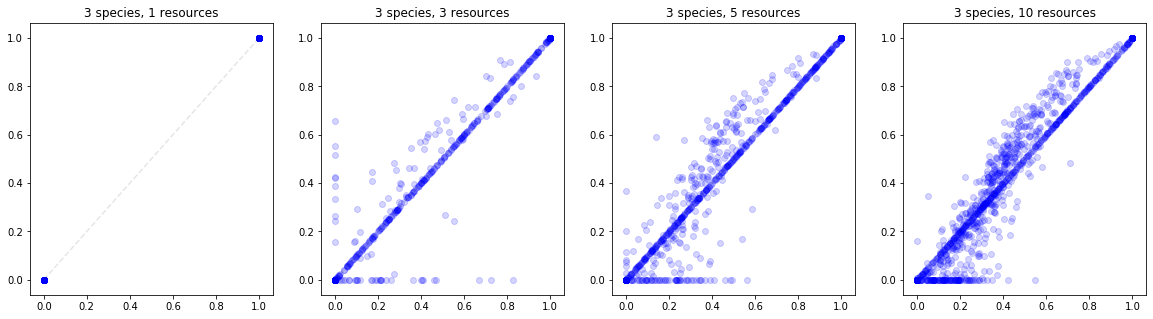

In [205]:
fig, ax = plt.subplots(1, len(Rs),figsize=(5*len(Ss),5));
for i in np.arange(len(Rs)):
    S = 3; R = Rs[i]; thres=1e-4;
    surv = survs[(S,R)]; #growth=growths[(S,R)];
    filt = filter_surv(surv, thres);
    surv = surv[filt]; #growth=growth[filt];

    #pred = arule_h(surv, repeat=False, thres=thres)
    pred = arule_h(surv, repeat=True, method=1, thres=thres)
    #ax[i,j].scatter(pred,surv[:,-1], alpha=0.03, color=(1-j/(len(Rs)-1),0.3,j/(len(Rs)-1)))
    ax[i].scatter(pred,surv[:,-1], alpha=0.5/S, color='b');
    #ax[i].text(0,1,'{} species, {} resource'.format(S,R) )
    #ax[i].legend(Rs, title='Number of resources')
    ax[i].plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--', alpha=0.1)
    ax[i].set_title('3 species, {} resources'.format(Rs[i]))

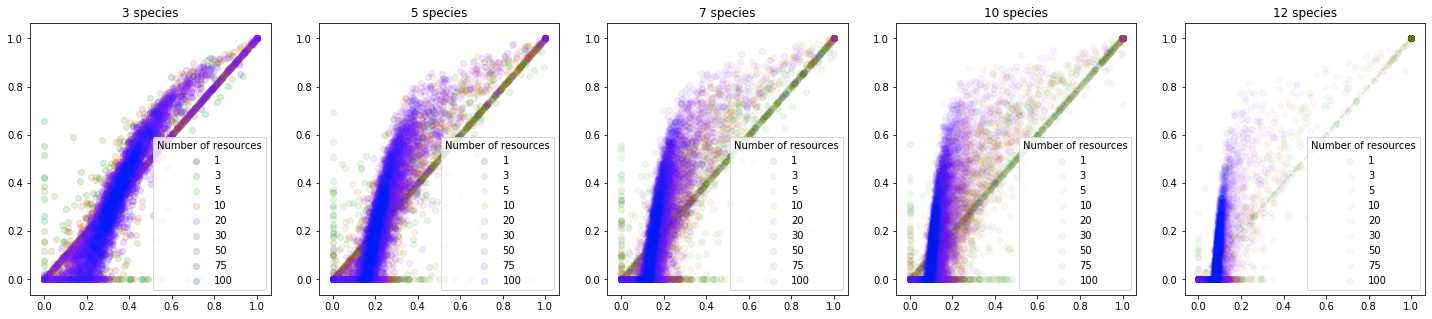

In [55]:
#Rs = [1,3,5,10];
fig, ax = plt.subplots(1, len(Ss),figsize=(5*len(Ss),5));
for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=1e-4;
        surv = survs[(S,R)]; #growth=growths[(S,R)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; #growth=growth[filt];
        
        #pred = arule_h(surv, repeat=False, thres=thres)
        pred = arule_h(surv, repeat=True, method=1, thres=thres)
        #ax[i,j].scatter(pred,surv[:,-1], alpha=0.03, color=(1-j/(len(Rs)-1),0.3,j/(len(Rs)-1)))
        ax[i].scatter(pred,surv[:,-1], alpha=0.5/S, color=colors[j]);
        #ax[i].text(0,1,'{} species, {} resource'.format(S,R) )
    ax[i].legend(Rs, title='Number of resources')
    ax[i].plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--', alpha=0.1)
    ax[i].set_title('{} species'.format(Ss[i]))

In [6]:
nviol={};
dist1={};
dist2={};
dist3={};
dist4={};

for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=1e-4;
        surv = survs[(S,R)]; #growth=growths[(S,R)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; #growth=growth[filt];
        
        #pred = arule_h(surv, repeat=False, thres=thres)
        pred = arule_h(surv, repeat=True, method=0, thres=thres)
        nviol[(S,R)] = ( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1) );
        #dist1[(S,R)] = ( np.sum( pred*surv[:,-1], axis=1)/ (np.sum(pred**2, axis=1)*np.sum(surv[:,-1]**2, axis=1) )**0.5 );
        #dist2[(S,R)] = ( 2*np.sum( pred*surv[:,-1], axis=1)/ (np.sum(pred**2, axis=1)+np.sum(surv[:,-1]**2, axis=1) ) );
        #dist3[(S,R)] = 1-( np.sum( (pred-surv[:,-1])**2, axis=1) )/2;
        #dist4[(S,R)] = 1-( np.sum( np.abs(pred-surv[:,-1]), axis=1) )/2
        dist3[(S,R)] = (( np.sum( (pred-surv[:,-1])**2, axis=1) ))**0.5;

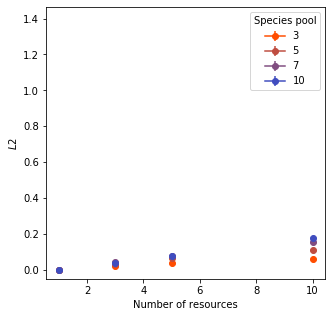

In [10]:
fig, ax = plt.subplots(figsize=(5,5));
qtype=4;
ax.set_xlabel('Number of resources');
if(qtype==0):
    for j in np.arange(len(Rs)):
        for i in np.arange(len(Ss)):
            ax.scatter(Rs[j], 1-np.average(nviol[(Ss[i],Rs[j])])/Ss[i], color=(1-i/len(Ss),0.3,i/len(Ss)), marker='o')
    #for j in np.arange(len(Rs)):
    #    for i in np.arange(len(Ss)):
    #        ax.scatter(Rs[j], np.average(arules[(Ss[i],Rs[j])]), color=(1-i/len(Ss),0.3,i/len(Ss)), marker='s', s=100, facecolor='none')
    ax.set_ylabel('Fraction of correctly predicted survival');
if(qtype==1):
    for j in np.arange(len(Rs)):
        for i in np.arange(len(Ss)):
            ax.scatter(Rs[j], 1-np.sum(nviol[(Ss[i],Rs[j])]>0)/np.sum(nviol[(Ss[i],Rs[j])]>-1), color=(1-i/len(Ss),0.3,i/len(Ss)), marker='o', alpha=0.8)
    for j in np.arange(len(Rs)):
        for i in np.arange(len(Ss)):
            ax.scatter(Rs[j], 1-np.sum(np.array(arules[(Ss[i],Rs[j])])<1)/np.sum(np.array(arules[(Ss[i],Rs[j])])<2), marker='s', s=100, color=(1-i/len(Ss),0.3,i/len(Ss)),  facecolor='none')
    ax.set_ylabel('Fraction of perfectly predicted community');
if(qtype==2):
    for j in np.arange(len(Rs)):
        for i in np.arange(len(Ss)):
            ax.errorbar(Rs[j], np.average(dist1[(Ss[i],Rs[j])]), yerr = np.std(dist1[(Ss[i],Rs[j])])/(500**0.5), color=(1-i/len(Ss),0.3,i/len(Ss)), marker='o')
    ax.set_ylabel(r'$d_1 = \frac{\vec{a}\cdot{\vec{b}}}{|a||b|}$');
if(qtype==3):
    for j in np.arange(len(Rs)):
        for i in np.arange(len(Ss)):
            ax.errorbar(Rs[j], np.average(dist2[(Ss[i],Rs[j])]), yerr = np.std(dist2[(Ss[i],Rs[j])])/(500**0.5), color=(1-i/len(Ss),0.3,i/len(Ss)), marker='o')
    ax.set_ylabel(r'$d_2 = \frac{2\vec{a}\cdot{\vec{b}}}{|a|^2+|b|^2}$');
if(qtype==4):
    for j in np.arange(len(Rs)):
        for i in np.arange(len(Ss)):
            ax.errorbar(Rs[j], np.average(dist3[(Ss[i],Rs[j])]), yerr = np.std(dist3[(Ss[i],Rs[j])])/(500**0.5), color=(1-i/len(Ss),0.3,i/len(Ss)), marker='o')
    #ax.set_ylabel(r'$d_3 = 1-|\vec{a}-\vec{b}|/2$');
    ax.set_ylabel(r'$L2$');
if(qtype==5):
    for j in np.arange(len(Rs)):
        for i in np.arange(len(Ss)):
            ax.errorbar(Rs[j], np.average(dist4[(Ss[i],Rs[j])]), yerr = np.std(dist4[(Ss[i],Rs[j])])/(500**0.5), color=(1-i/len(Ss),0.3,i/len(Ss)), marker='o')
    ax.set_ylabel(r'$d_4 = 1-\sum_\mu|\vec{a}_\mu-\vec{b}_\mu|/2$');

ax.legend(Ss, title='Species pool');
ax.set_ylim(-0.05,0.05+2**0.5);

    #plt.xscale('log')

In [10]:
thres=1e-2;
surv = survs[(10,10)];
pred1 = arule_h(surv, repeat=True, thres=thres)
pred2 = arule_h(surv, repeat=False, thres=thres)
pred3 = arule_m(surv, thres=thres)
print( np.sum( np.sum( ( (pred1>thres)!=(surv[:,-1]>thres) ), axis=1) !=0 ) )
print( np.sum( np.sum( ( (pred2>thres)!=(surv[:,-1]>thres) ), axis=1) !=0 ) )
print( np.sum(pred3<1) )
print ( np.average( ( np.sum( np.abs(pred1-surv[:,-1]), axis=1) )/2) )
print ( np.std( ( np.sum( np.abs(pred1-surv[:,-1]), axis=1) )/2) )
print ( np.average( ( np.sum( np.abs(pred2-surv[:,-1]), axis=1) )/2) )
print ( np.std( ( np.sum( np.abs(pred2-surv[:,-1]), axis=1) )/2) )

KeyboardInterrupt: 

(array([153., 114.,  94.,   0.,  62.,  43.,   0.,  21.,  11.,   2.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

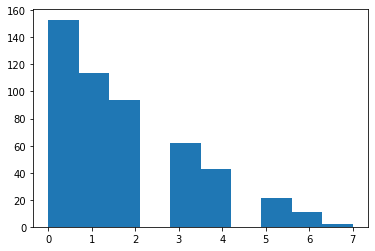

In [300]:
plt.hist( ( np.sum( ( (pred2>thres)!=(surv[:,-1]>thres) ), axis=1) ) )

(array([63., 45., 87., 89., 68., 65., 52., 24.,  6.,  1.]),
 array([6.82695041e-05, 7.76278454e-02, 1.55187421e-01, 2.32746997e-01,
        3.10306573e-01, 3.87866149e-01, 4.65425725e-01, 5.42985301e-01,
        6.20544877e-01, 6.98104453e-01, 7.75664029e-01]),
 <a list of 10 Patch objects>)

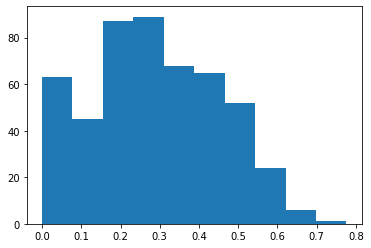

In [301]:
plt.hist(  np.sum( np.abs(pred2-surv[:,-1]), axis=1)/2 ) 

In [42]:
survss=[]
for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        survss += list(survs[(S,R)]);

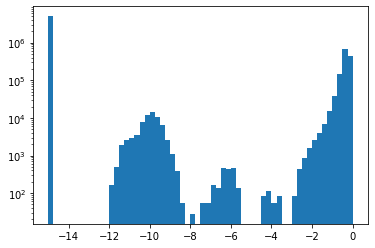

In [44]:
hst = plt.hist( np.log10(np.array(survss)+1e-15).reshape(-1), bins=np.linspace(-15,0,61) );
#plt.ylim(0,200000)
plt.yscale('log')

In [50]:
print(hst[0][0])
print(np.sum(hst[0][1:48]))
print(np.sum(hst[0][48:]))
print( np.sum(hst[0][1:48])/hst[0][0])

5040000.0
69272.0
1330728.0
0.013744444444444445


In [70]:
print('#R, #cross, ')
for i in np.arange(7):
    R = Rs[i];
    nocross = nocrosss[(3,R)];
    ncs = np.array(arules[(3,R)])[np.array(nocross)>0];
    cs = np.array(arules[(3,R)])[np.array(nocross)==0];
    print(R, len(ncs), np.sum(ncs==1), np.sum(ncs==0), np.average(ncs), len(cs), np.sum(cs==1), np.sum(cs==0), np.average(cs))

#R, #cross, 
1 500 500 0 1.0 0 0 0 nan
3 278 278 0 1.0 222 222 0 1.0
5 82 82 0 1.0 418 418 0 1.0
10 3 3 0 1.0 497 497 0 1.0
20 0 0 0 nan 500 499 0 0.9993333333333333
30 0 0 0 nan 500 494 0 0.996
50 0 0 0 nan 500 498 0 0.9986666666666667


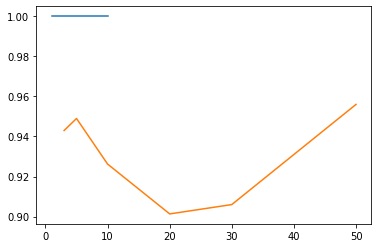

In [7]:
rs1 = [1,3,5,10]; ps1 = [1,1,1,1];
rs2 = [3,5,10,20,30,50]; ps2=[0.942942942942943,0.94896331738437,0.9262240107310531,0.9013333333333332,0.906,0.956];
plt.plot(rs1, ps1);
plt.plot(rs2, ps2);

In [19]:
nocross = nocrosss[(3,5)];
np.array(arules[(3,5)])[np.array(nocross)>0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [3]:
arule_aves = np.zeros((len(Ss),len(Rs)));
nsurv_aves = np.zeros((len(Ss),len(Rs)));
npair_aves = np.zeros((len(Ss),len(Rs)));
gpreds_aves = np.zeros((len(Ss),len(Rs)));
arule_stds = np.zeros((len(Ss),len(Rs)));
nsurv_stds = np.zeros((len(Ss),len(Rs)));
npair_stds = np.zeros((len(Ss),len(Rs)));
gpreds_stds = np.zeros((len(Ss),len(Rs)));
lens = np.zeros((len(Ss),len(Rs)));
for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j];
        key = (S,R);
        arule_aves[i,j] = np.average(arules[key]);
        nsurv_aves[i,j] = np.average(nsurvs[key]);
        npair_aves[i,j] = np.average(nsurvs2[key]);
        gpreds_aves[i,j] = np.average(gpreds[key]);
        arule_stds[i,j] = np.std(np.array(arules[key]));
        nsurv_stds[i,j] = np.std(np.array(nsurvs[key]));
        npair_stds[i,j] = np.std(np.array(nsurvs2[key]));
        gpreds_stds[i,j] = np.std(np.array(gpreds[key]));
        lens[i,j] = len( arules[key] )

In [ ]:
nocross = np.zeros((len(Rs),5

In [15]:
nc0s = np.zeros((10,3));
nc0s[0]=[0.99,0.01,0]; nc0s[1]=[0.01,0.99,0];nc0s[2]=[0.01,0.,0.99];nc0s[3]=[0.99,0.,0.01];nc0s[4]=[0.,0.99,0.01];nc0s[5]=[0,0.01,0.99];nc0s[6]=[0.99,0.005,0.005];nc0s[7]=[0.005,0.99,0.005];nc0s[8]=[0.005,0.005,0.99];nc0s[9]=[0.33,0.33,0.34];

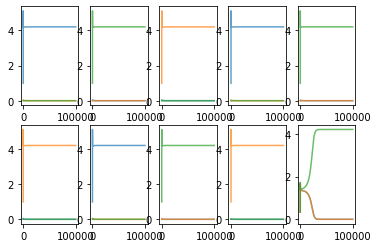

In [17]:
fig, ax = plt.subplots(2,5);
t = np.linspace(0,100000,100000); dt=t[1]-t[0];
for j in np.arange(10):
    nc0 = np.ones(6); nc0[:3]=np.copy(nc0s[j]);
    d=0.02; R=np.array([[2,1,1],[1,2,1],[1,1,2]]); RA=np.array([[0.9,1,1],[1,0.9,1],[1,1,0.9]]); c0=[1,1,1]
    nc = integrate.odeint(dnc33, nc0, t, args= (d,R,RA,c0) )
    ax[j%2, j//2].plot(nc[:,0], alpha=0.7);
    ax[j%2, j//2].plot(nc[:,1], alpha=0.7);
    ax[j%2, j//2].plot(nc[:,2], alpha=0.7);

## Bistable simulation

In [11]:
survs = load_obj('220815_survs_bistable');
#growths = load_obj('211123_growths_bistable')
nb, types, ind_viol, unobss = arule_b(survs);

[[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]] 1 0 [[0, 0, 0]] 3.0 1.0
[[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]] 1 0 [[0, 0, 0]] 3.0 1.0
[[0 1 0]
 [0 1 0]
 [1 0 1]
 [1 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 1 1]
 [1 1 1]] 1 0 [[1, 0, 1], [0, 1, 0]] 4.0 1.0
[[1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]] 2 1 [[0, 0, 1]] 3.0 1.0
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]] 0 1 [[1, 0, 0]] 3.0 1.0
189 5 183 1485


In [12]:
ind_unob = np.where(unobss>0)[0];

In [13]:
for i in np.arange(len(ind_unob)):
    print(i)
    print( 1*(survs[ind_unob]>1e-4)[i] )

0
[[0 1 0]
 [0 1 0]
 [1 0 1]
 [1 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]
1
[[1 1 0]
 [1 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]
2
[[1 1 0]
 [1 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]
3
[[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]
4
[[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]
5
[[0 1 0]
 [0 1 0]
 [1 0 1]
 [1 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 1 1]
 [1 1 1]]
6
[[1 0 0]
 [0 1 0]
 [1 0 1]
 [1 0 1]
 [0 1 1]
 [0 1 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
7
[[1 1 0]
 [1 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]
8
[[1 1 0]
 [1 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]]
9
[[1 1 0]
 [1 1 0]
 [1 0 1]
 [1 0 1]
 [0 1 0]
 [0 0 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]]
10
[[1 0 0]
 [0 1 0]
 [1 0 1]
 [1 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 

In [14]:
growths = load_obj('220815_growths_bistable');
invyields = load_obj('220815_invyields_bistable');

In [15]:
nc0s = np.zeros((10,3));
nc0s[0]=[0.99,0.01,0]; nc0s[1]=[0.01,0.99,0];nc0s[2]=[0.01,0.,0.99];nc0s[3]=[0.99,0.,0.01];nc0s[4]=[0.,0.99,0.01];nc0s[5]=[0,0.01,0.99];nc0s[6]=[0.99,0.005,0.005];nc0s[7]=[0.005,0.99,0.005];nc0s[8]=[0.005,0.005,0.99];nc0s[9]=[0.33,0.33,0.33];

In [16]:
ind_viol

[569, 613, 664, 908, 2215]

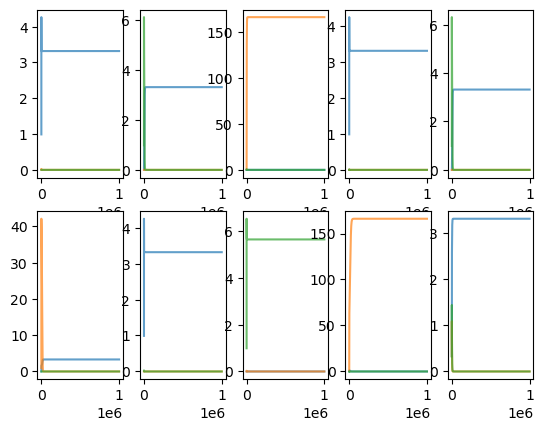

In [17]:
ind=2215;
fig, ax = plt.subplots(2,5);
t = np.linspace(0,100000,1000000); dt=t[1]-t[0];
for j in np.arange(10):
    nc0 = np.ones(6); nc0[:3]=np.copy(nc0s[j]);
    d=0.02; R=growths[ind]; RA=growths[ind]*invyields[ind]; c0=[1,1,1]
    nc = integrate.odeint(dnc33, nc0, t, args= (d,R,RA,c0) )
    ax[j%2, j//2].plot(nc[:,0], alpha=0.7);
    ax[j%2, j//2].plot(nc[:,1], alpha=0.7);
    ax[j%2, j//2].plot(nc[:,2], alpha=0.7);

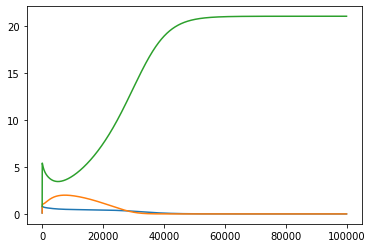

In [27]:
plt.plot(nc[:,0]);
plt.plot(nc[:,1]);
plt.plot(nc[:,2]);

In [20]:
viols = [1,1,0,0,1,0,0,0,0];
unobs = [0,0,0,0,9,3,0,0,0];

In [27]:
np.sum( (nb<4) )

3332

In [25]:
np.sum(viols)/np.sum( (nb>0)*(nb<4) )

0.015463917525773196

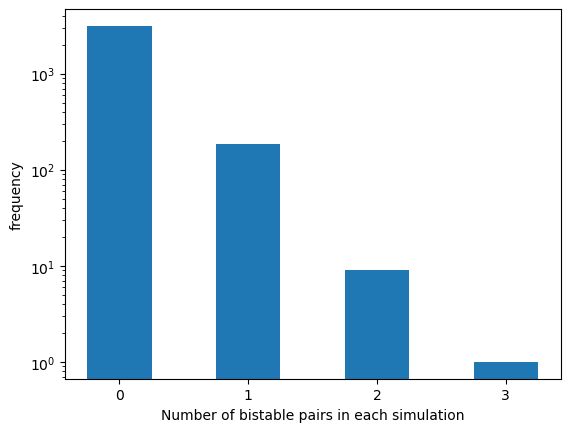

In [18]:
fig, ax = plt.subplots()
ax.set_xticks([0,1,2,3]);
hst = ax.hist( nb, bins=np.linspace(-0.25,3.25,8) )
ax.set_xlabel('Number of bistable pairs in each simulation')
ax.set_ylabel('frequency')
ax.set_yscale('log')

[ 18.   6. 123.   6.  25.   4.   6.   3.   1.]


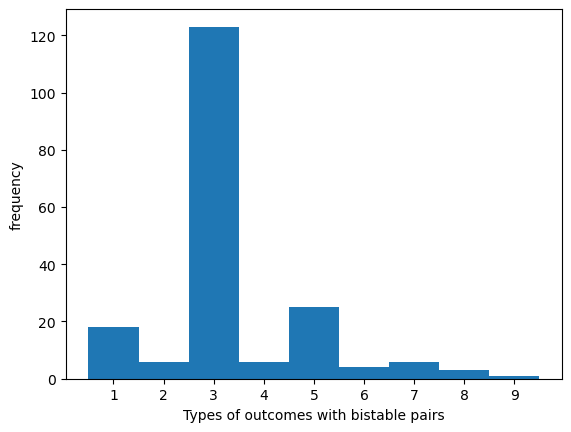

In [19]:
fig, ax = plt.subplots()
ax.set_xticks(np.arange(9)+1);
hst = ax.hist( types, bins=np.arange(10)+0.5 )[0];
ax.set_xlabel('Types of outcomes with bistable pairs')
ax.set_ylabel('frequency')
print(hst)
#ax.set_yscale('log')

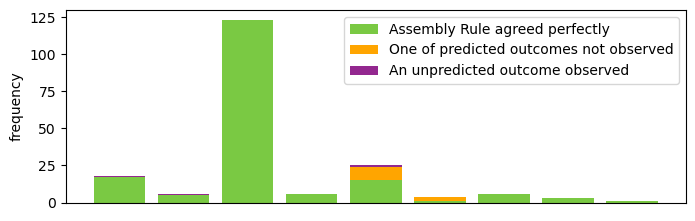

In [50]:
fig, ax = plt.subplots(figsize=(8,2.5));
ax.bar(np.arange(9)+1,np.array(hst)-np.array(viols)-np.array(unobs),color='#7AC943');
ax.bar(np.arange(9)+1,np.array(unobs),bottom=np.array(hst)-np.array(viols)-np.array(unobs),color='orange');
ax.bar(np.arange(9)+1,np.array(viols),bottom=np.array(hst)-np.array(viols),color='#93278F');
#ax.set_xticks(np.arange(9)+1);
#ax.set_xlabel('Pairwise outcome type');
ax.set_ylabel('frequency');
ax.set_ylim(0,130);
ax.set_xticks([]);
ax.legend(['Assembly Rule agreed perfectly','One of predicted outcomes not observed','An unpredicted outcome observed']);
fig.savefig('fig_v1/sa5_2.pdf', bbox_inches='tight')

## Fig. Sx (experiment)

In [26]:
data = pd.read_csv('expm_temp.txt',sep='\t')

In [27]:
ts = ['30C','25C','16C','11C']
survs_t = np.zeros((4,4,4,3));
survs_t_f = np.zeros((16,4,3));
for i in np.arange(4):
    for j in np.arange(4):
        data_p = data[(data['Trio']==i+1) & (data['Temp']==ts[j]) ];
        survs_t[i,j,3,0] = np.nanmean( data_p['Sp1_End'][:4] );
        survs_t[i,j,3,1] = np.nanmean( data_p['Sp2_End'][:4] );
        survs_t[i,j,3,2] = np.nanmean( data_p['Sp3_End'][:4] );
        survs_t[i,j,0,0] = np.nanmean( data_p['Sp1_End'][4:6] );
        survs_t[i,j,0,1] = np.nanmean( data_p['Sp2_End'][4:6] );
        survs_t[i,j,0,2] = np.nanmean( data_p['Sp3_End'][4:6] );
        survs_t[i,j,1,0] = np.nanmean( data_p['Sp1_End'][6:8] );
        survs_t[i,j,1,1] = np.nanmean( data_p['Sp2_End'][6:8] );
        survs_t[i,j,1,2] = np.nanmean( data_p['Sp3_End'][6:8] );
        survs_t[i,j,2,0] = np.nanmean( data_p['Sp1_End'][8:] );
        survs_t[i,j,2,1] = np.nanmean( data_p['Sp2_End'][8:] );
        survs_t[i,j,2,2] = np.nanmean( data_p['Sp3_End'][8:] );
        survs_t_f[i*4+j]=survs_t[i,j]
survs_t = survs_t/100;
survs_t_f = survs_t_f/100;

C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [28]:
distave = 0;
for i in np.arange(4):
    surv = survs_t[:,i];
    pred = arule_h(surv, repeat=True, method=0, thres=thres);
    accu = 1-np.average( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;
    dist = (( np.sum( (pred-surv[:,-1])**2, axis=1) ))**0.5;
    print( accu )
    print( dist )
    distave += np.nanmean(dist)/4;
print(distave)

C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide


0.95
[0.01087857 0.10606602 0.10606602 0.2335074 ]
0.925
[0.44794965 0.08131728 0.2249157  0.18219187]
0.95
[0.33431977 0.07030556 0.07363261 0.67175144]


C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


0.975
[0.         0.35355339        nan 0.02357023]
0.1903583356429035


C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


6 [0, 1, 1] [[False  True False]
 [ True False  True]
 [False  True  True]
 [ True  True  True]]
9 [1, 0, 1] [[ True  True False]
 [ True False  True]
 [False False  True]
 [ True  True  True]]
11 [1, 1, 1] [[False  True False]
 [False False False]
 [False  True False]
 [False  True False]]


Text(0, 0.5, 'Frequency ')

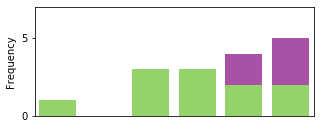

In [14]:
outcome, viol = arule(survs_t_f, thres=0.001);
#print(outcome)

fig, ax = plot_outcome3(outcome)
fig.set_size_inches(5, 2);
ax.set_ylim(0,7)
ax.set_yticks([0,5]);
#ax.set_yticklabels([0,5])
ax.set_ylabel('Frequency ')
#plt.gca().set_axis_off()

In [29]:
data_trio = pd.read_csv('expm_d_trio.csv')
data_pair = pd.read_csv('expm_d_pair.csv')

In [30]:
ss = ['Ea','Pa','Pci','Pp','Pv'];
drs = [10,100,1000,10000,100000,1000000];
trios = [(0,1,2),(0,2,4),(0,3,2),(3,2,1),(3,2,4)];
survs_d = np.zeros((5,6,4,3));
survs_d_f = np.zeros((30,4,3));
for i in np.arange(5):
    for j in np.arange(6):
        trio = trios[i];
        data_p = data_trio[ (data_trio['DilutionRate']==drs[j]) & (data_trio['SpeciesA']==ss[trio[0]]) & (data_trio['SpeciesB']==ss[trio[1]]) & (data_trio['SpeciesC']==ss[trio[2]]) ];
        survs_d[i,j,3,0] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,3,1] = np.nanmean(data_p['Bfraction']);
        survs_d[i,j,3,2] = np.nanmean(data_p['Cfraction']);
        
        data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[0]]) & (data_pair['SpeciesB'] == ss[trio[1]])   ];
        survs_d[i,j,0,0] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,0,1] = np.nanmean(data_p['Bfraction']);
        if(len(data_p)==0): 
            data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[1]]) & (data_pair['SpeciesB'] == ss[trio[0]])   ];
            survs_d[i,j,0,1] = np.nanmean(data_p['Afraction']);
            survs_d[i,j,0,0] = np.nanmean(data_p['Bfraction']);
            
        data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) & (data_pair['SpeciesA']==ss[trio[2]]) & (data_pair['SpeciesB']==ss[trio[0]])];
        survs_d[i,j,1,2] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,1,0] = np.nanmean(data_p['Bfraction']);
        if(len(data_p)==0): 
            data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[0]]) & (data_pair['SpeciesB'] == ss[trio[2]])   ];
            survs_d[i,j,1,0] = np.nanmean(data_p['Afraction']);
            survs_d[i,j,1,2] = np.nanmean(data_p['Bfraction']);
            
        data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) & (data_pair['SpeciesA']==ss[trio[1]]) & (data_pair['SpeciesB']==ss[trio[2]])];
        survs_d[i,j,2,1] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,2,2] = np.nanmean(data_p['Bfraction']);
        if(len(data_p)==0): 
            data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[2]]) & (data_pair['SpeciesB'] == ss[trio[1]])   ];
            survs_d[i,j,2,2] = np.nanmean(data_p['Afraction']);
            survs_d[i,j,2,1] = np.nanmean(data_p['Bfraction']);
            
        survs_d_f[i*6+j] = survs_d[i,j];

C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


In [31]:
distave = 0;
for i in np.arange(4):
    surv = survs_d[:,i];
    pred = arule_h(surv, repeat=True, method=0, thres=thres);
    accu = 1-np.average( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;
    dist = (( np.sum( (pred-surv[:,-1])**2, axis=1) ))**0.5;
    print( accu )
    print( dist )
    distave += np.nanmean(dist)/4;
print(distave)

C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide


0.94
[0.00175478 0.00144543 0.16847482 0.         0.03666178]
0.98
[0.36536388 0.11397246 0.2927079  0.14863425 0.24373551]
1.0
[0.13987063 0.13586702 0.31763142 0.07633036 0.10786418]
0.96
[0.28246925 0.01098401 0.25618614 0.19027851 0.20669595]
0.1548464150850609


0 [1, 1, 0] [[ True  True False]
 [ True False  True]
 [False  True False]
 [False  True False]]
5 [1, 0, 0] [[ True False False]
 [ True False False]
 [False False  True]
 [ True False  True]]
9 [1, 1, 0] [[ True  True False]
 [ True False False]
 [False  True  True]
 [ True  True  True]]
11 [1, 0, 0] [[ True False False]
 [ True False False]
 [False  True False]
 [ True  True False]]
23 [1, 0, 0] [[ True False False]
 [ True False False]
 [False  True False]
 [ True  True False]]
24 [0, 0, 1] [[ True  True False]
 [False False  True]
 [False False  True]
 [ True  True  True]]


Text(0, 0.5, 'Frequency ')

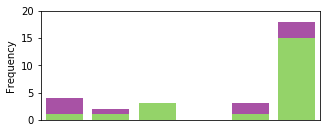

In [18]:
outcome, viol = arule(survs_d_f, thres=0.001);
#print(outcome)

fig, ax = plot_outcome3(outcome)
fig.set_size_inches(5, 2);
ax.set_ylim(0,20)
ax.set_yticks([0,5,10,15,20]);
#ax.set_yticklabels([0,5])
ax.set_ylabel('Frequency ')
#plt.gca().set_axis_off()

In [19]:
surv[np.isnan(pred[:,0])]

array([], shape=(0, 4, 3), dtype=float64)

C:\Users\Hyun\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Hyun\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


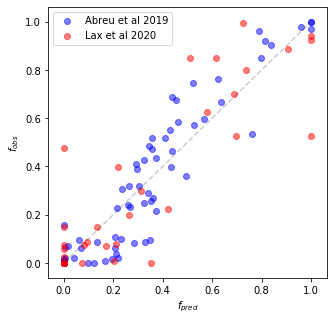

In [20]:
fig, ax = plt.subplots(figsize=(5,5));
surv = survs_d_f;
filt = filter_surv(surv, thres);
surv = surv[filt];
pred = arule_h(surv, repeat=True, method=1, thres=thres)
ax.scatter(pred[np.isnan(pred[:,0])==False],surv[np.isnan(pred[:,0])==False,-1], alpha=0.5, color='b');
surv = survs_t_f;
filt = filter_surv(surv, thres);
surv = surv[filt];
pred = arule_h(surv, repeat=True, method=1, thres=thres)
ax.scatter(pred[np.isnan(pred[:,0])==False], surv[np.isnan(pred[:,0])==False,-1], alpha=0.5, color='r');
#ax.text(0,1,'{} species, {} resource'.format(S,R) )
ax.set_xlabel(r'$f_{pred}$'); ax.set_ylabel(r'$f_{obs}$');
ax.legend(['Abreu et al 2019', 'Lax et al 2020']);
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--', alpha=0.2);


In [ ]:
dist_f = (( np.sum( (pred-surv[:,-1])**2, axis=1) ))**0.5;

In [155]:
surv = survs_t_f;
filt = filter_surv(surv, thres);
surv = surv[filt];
pred = arule_h(surv, repeat=True, method=0, thres=thres)


C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide


In [156]:
x = pred[np.isnan(pred[:,0])==False].reshape(-1); y= surv[np.isnan(pred[:,0])==False,-1].reshape(-1);
np.average(np.abs(x-y))

0.09526073539826378

In [148]:
r_value

0.8673352306574466

In [364]:
surv = survs_d_f;

filt = filter_surv(surv, thres); ## filters out extinctions
surv = surv[filt]; #growth=growth[filt];
surv = surv*(surv>thres)+thres*0.1;

pred = arule_h(surv, repeat=True, method=0, thres=thres);
accu = 1-np.average( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;
accu_bc = 1-np.average( 2*np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1)/(np.sum( pred>thres, axis=1)+np.sum( surv[:,-1]>thres, axis=1))  );
accu_q1 = np.median( ( np.sum( np.min([pred,surv[:,-1]], axis=0), axis=1) ) ); # community overlap
#accu_q2[k,i,j] = np.median( np.average( np.abs(pred-surv[:,-1]), axis=1) ); # average difference in fraction
accu_q3 = np.median( np.sum( (pred-surv[:,-1])**2, axis=1)/2 ); # L2 norm
            

In [367]:
accu_q3

0.006718522622402472

## Fig. Sxx (phase diagrams)

Text(0, 0.5, '$c_{2}^s$')

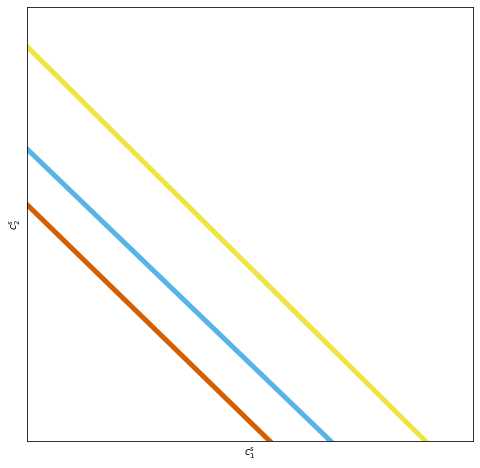

In [11]:
d=0.6;
a11=1; a12=1; a21=1; a22=1; a31=1; a32=1;
r11=1; r12=1; r21=0.8; r22=0.81; r31=0.61; r32=0.6;

R12 = np.array([[ r11,r12 ],[r21,r22]]); RA12 = np.array([[ r11*a11,r12*a12 ],[r21*a21,r22*a22]]);
R23 = np.array([[ r21,r22 ],[r31,r32]]); RA23 = np.array([[ r21*a21,r22*a22 ],[r31*a31,r32*a32]]);
R13 = np.array([[ r11,r12 ],[r31,r32]]); RA13 = np.array([[ r11*a11,r12*a12 ],[r31*a31,r32*a32]]);
R123 = np.array([[ r11,r12 ],[ r21,r22 ],[r31,r32]]); RA123 = np.array([[ r11*a11,r12*a12 ],[ r21*a21,r22*a22 ],[r31*a31,r32*a32]]);
#plt.xlim(0,np.max([d/r11,d/r21,d/r31])); plt.ylim(0,np.max([d/r12,d/r22,d/r32]));
n1x = np.linspace(0,d/r11,10); n1y=np.linspace(d/r12,0,10);
n2x = np.linspace(0,d/r21,10); n2y=np.linspace(d/r22,0,10);
n3x = np.linspace(0,d/r31,10); n3y=np.linspace(d/r32,0,10);
x12 = d*(r22-r12)/(r11*r22-r12*r21); y12=d*(r11-r21)/(r11*r22-r12*r21);
c1x_12= np.linspace(x12,x12+20*a11*r11*np.abs(r22-r12),10); c1y_12= np.linspace(y12,y12+20*a12*r12*np.abs(r11-r21),10);
c2x_12= np.linspace(x12,x12+20*a21*r21*np.abs(r22-r12),10); c2y_12= np.linspace(y12,y12+20*a22*r22*np.abs(r11-r21),10);
x23 = d*(r32-r22)/(r21*r32-r22*r31); y23=d*(r21-r31)/(r21*r32-r22*r31);
c1x_23= np.linspace(x23,x23+20*a21*r21*np.abs(r32-r22),10); c1y_23= np.linspace(y23,y23+20*a22*r22*np.abs(r21-r31),10);
c2x_23= np.linspace(x23,x23+20*a31*r31*np.abs(r32-r22),10); c2y_23= np.linspace(y23,y23+20*a32*r32*np.abs(r21-r31),10);
x13 = d*(r32-r12)/(r11*r32-r12*r31); y13=d*(r11-r31)/(r11*r32-r12*r31);
c1x_13= np.linspace(x13,x13+20*a11*r11*np.abs(r32-r12),10); c1y_13= np.linspace(y13,y13+20*a12*r12*np.abs(r11-r31),10);
c2x_13= np.linspace(x13,x13+20*a31*r31*np.abs(r32-r12),10); c2y_13= np.linspace(y13,y13+20*a32*r32*np.abs(r11-r31),10);

# violation 1

fig, ax = plt.subplots( figsize=(8,8)  );
ax.plot(n1x,n1y,color='#D55E00', linewidth=5)
ax.plot(n2x,n2y,color='#56B4E9', linewidth=5)
ax.plot(n3x,n3y,color='#F0E442', linewidth=5)
#ax.plot(n1x,n1y,color='k', linewidth=1)
ax.plot(c1x_12,c1y_12,color='#D55E00', linestyle='--')
ax.plot(c2x_12,c2y_12,color='#56B4E9',linestyle='--')
ax.plot(c1x_13,c1y_13,color='#D55E00',linestyle='--')
ax.plot(c2x_13,c2y_13,'#F0E442',linestyle='--')
ax.plot(c1x_23,c1y_23,color='#56B4E9',linestyle='--')
ax.plot(c2x_23,c2y_23,'#F0E442',linestyle='--')

ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xticks([]); ax.set_yticks([]);

ax.set_xlabel('$c_{1}^s$');ax.set_ylabel('$c_{2}^s$')



Text(0, 0.5, '$c_{2}$')

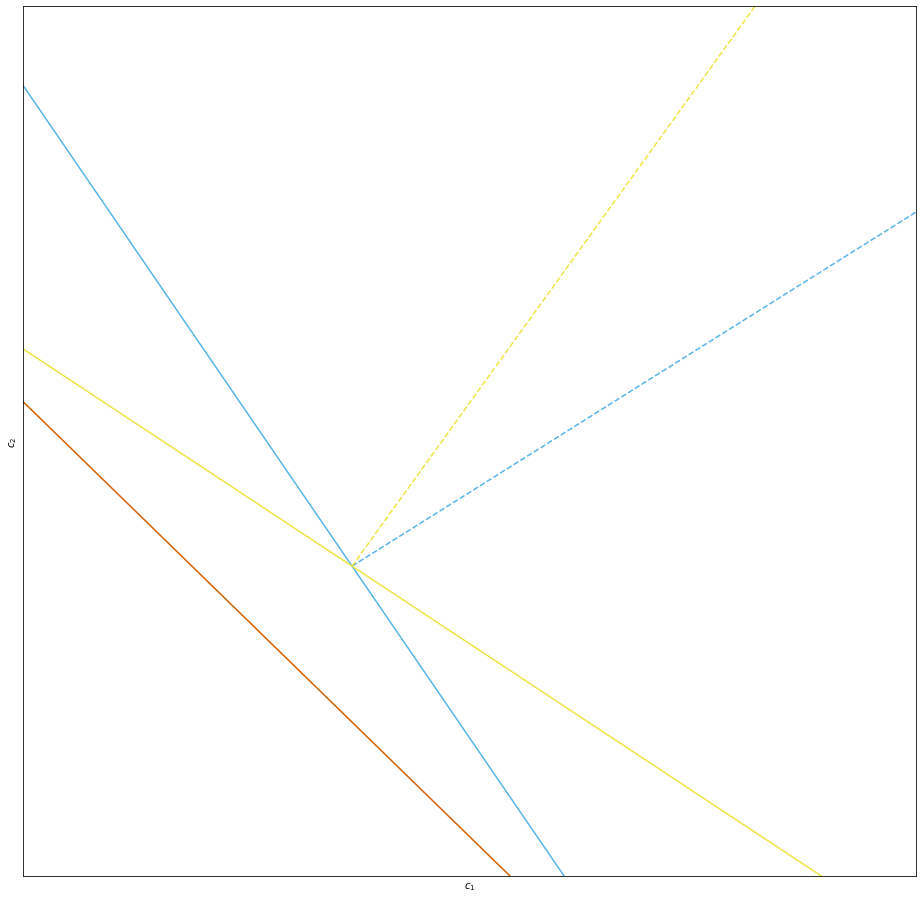

In [14]:
d=0.6;
a11=1; a12=1; a21=1; a22=1; a31=1; a32=1;
r11=1; r12=1; r21=0.9; r22=0.6; r31=0.61; r32=0.9;

R12 = np.array([[ r11,r12 ],[r21,r22]]); RA12 = np.array([[ r11*a11,r12*a12 ],[r21*a21,r22*a22]]);
R23 = np.array([[ r21,r22 ],[r31,r32]]); RA23 = np.array([[ r21*a21,r22*a22 ],[r31*a31,r32*a32]]);
R13 = np.array([[ r11,r12 ],[r31,r32]]); RA13 = np.array([[ r11*a11,r12*a12 ],[r31*a31,r32*a32]]);
R123 = np.array([[ r11,r12 ],[ r21,r22 ],[r31,r32]]); RA123 = np.array([[ r11*a11,r12*a12 ],[ r21*a21,r22*a22 ],[r31*a31,r32*a32]]);
#plt.xlim(0,np.max([d/r11,d/r21,d/r31])); plt.ylim(0,np.max([d/r12,d/r22,d/r32]));
n1x = np.linspace(0,d/r11,10); n1y=np.linspace(d/r12,0,10);
n2x = np.linspace(0,d/r21,10); n2y=np.linspace(d/r22,0,10);
n3x = np.linspace(0,d/r31,10); n3y=np.linspace(d/r32,0,10);
x12 = d*(r22-r12)/(r11*r22-r12*r21); y12=d*(r11-r21)/(r11*r22-r12*r21);
c1x_12= np.linspace(x12,x12+20*a11*r11*np.abs(r22-r12),10); c1y_12= np.linspace(y12,y12+20*a12*r12*np.abs(r11-r21),10);
c2x_12= np.linspace(x12,x12+20*a21*r21*np.abs(r22-r12),10); c2y_12= np.linspace(y12,y12+20*a22*r22*np.abs(r11-r21),10);
x23 = d*(r32-r22)/(r21*r32-r22*r31); y23=d*(r21-r31)/(r21*r32-r22*r31);
c1x_23= np.linspace(x23,x23+20*a21*r21*np.abs(r32-r22),10); c1y_23= np.linspace(y23,y23+20*a22*r22*np.abs(r21-r31),10);
c2x_23= np.linspace(x23,x23+20*a31*r31*np.abs(r32-r22),10); c2y_23= np.linspace(y23,y23+20*a32*r32*np.abs(r21-r31),10);
x13 = d*(r32-r12)/(r11*r32-r12*r31); y13=d*(r11-r31)/(r11*r32-r12*r31);
c1x_13= np.linspace(x13,x13+20*a11*r11*np.abs(r32-r12),10); c1y_13= np.linspace(y13,y13+20*a12*r12*np.abs(r11-r31),10);
c2x_13= np.linspace(x13,x13+20*a31*r31*np.abs(r32-r12),10); c2y_13= np.linspace(y13,y13+20*a32*r32*np.abs(r11-r31),10);

# violation 1

fig, ax = plt.subplots( figsize=(16,16)  );
ax.plot(n1x,n1y,color='#D55E00')
ax.plot(n2x,n2y,color='#56B4E9')
ax.plot(n3x,n3y,color='#F0E442')
ax.plot(c1x_12,c1y_12,color='#D55E00', linestyle='--')
ax.plot(c2x_12,c2y_12,color='#56B4E9',linestyle='--')
ax.plot(c1x_13,c1y_13,color='#D55E00',linestyle='--')
ax.plot(c2x_13,c2y_13,'#F0E442',linestyle='--')
ax.plot(c1x_23,c1y_23,color='#56B4E9',linestyle='--')
ax.plot(c2x_23,c2y_23,'#F0E442',linestyle='--')

ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xticks([]); ax.set_yticks([]);

ax.set_xlabel('$c_{1}$');ax.set_ylabel('$c_{2}$')



Text(0, 0.5, '$c_{2}$')

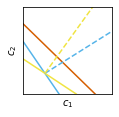

In [15]:
d=0.4;
a11=1; a12=1; a21=1; a22=1; a31=1; a32=1;
r11=0.45; r12=0.45; r21=0.9; r22=0.6; r31=0.61; r32=0.9;

n1x = np.linspace(0,d/r11,10); n1y=np.linspace(d/r12,0,10);
n2x = np.linspace(0,d/r21,10); n2y=np.linspace(d/r22,0,10);
n3x = np.linspace(0,d/r31,10); n3y=np.linspace(d/r32,0,10);
x12 = d*(r22-r12)/(r11*r22-r12*r21); y12=d*(r11-r21)/(r11*r22-r12*r21);
c1x_12= np.linspace(x12,x12+20*a11*r11*np.abs(r22-r12),10); c1y_12= np.linspace(y12,y12+20*a12*r12*np.abs(r11-r21),10);
c2x_12= np.linspace(x12,x12+20*a21*r21*np.abs(r22-r12),10); c2y_12= np.linspace(y12,y12+20*a22*r22*np.abs(r11-r21),10);
x23 = d*(r32-r22)/(r21*r32-r22*r31); y23=d*(r21-r31)/(r21*r32-r22*r31);
c1x_23= np.linspace(x23,x23+20*a21*r21*np.abs(r32-r22),10); c1y_23= np.linspace(y23,y23+20*a22*r22*np.abs(r21-r31),10);
c2x_23= np.linspace(x23,x23+20*a31*r31*np.abs(r32-r22),10); c2y_23= np.linspace(y23,y23+20*a32*r32*np.abs(r21-r31),10);
x13 = d*(r32-r12)/(r11*r32-r12*r31); y13=d*(r11-r31)/(r11*r32-r12*r31);
c1x_13= np.linspace(x13,x13+20*a11*r11*np.abs(r32-r12),10); c1y_13= np.linspace(y13,y13+20*a12*r12*np.abs(r11-r31),10);
c2x_13= np.linspace(x13,x13+20*a31*r31*np.abs(r32-r12),10); c2y_13= np.linspace(y13,y13+20*a32*r32*np.abs(r11-r31),10);

fig, ax = plt.subplots( figsize=(1.6,1.6)  );
ax.plot(n1x,n1y,color='#D55E00')
ax.plot(n2x,n2y,color='#56B4E9')
ax.plot(n3x,n3y,color='#F0E442')
ax.plot(c1x_12,c1y_12,color='#D55E00', linestyle='--')
ax.plot(c2x_12,c2y_12,color='#56B4E9',linestyle='--')
ax.plot(c1x_13,c1y_13,color='#D55E00',linestyle='--')
ax.plot(c2x_13,c2y_13,'#F0E442',linestyle='--')
ax.plot(c1x_23,c1y_23,color='#56B4E9',linestyle='--')
ax.plot(c2x_23,c2y_23,'#F0E442',linestyle='--')

ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xticks([]); ax.set_yticks([]);

ax.set_xlabel('$c_{1}$');ax.set_ylabel('$c_{2}$')



Text(0, 0.5, '$c_{2}$')

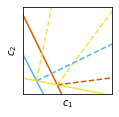

In [16]:
d=0.1;
a11=1; a12=1; a21=1; a22=1; a31=1; a32=1;
r21=0.4; r22=0.2; r11=0.21;  r12=0.1; r31=0.1;  r32=0.5; c10 = 0.65; c20=0.85; # for main text fig

n1x = np.linspace(0,d/r11,10); n1y=np.linspace(d/r12,0,10);
n2x = np.linspace(0,d/r21,10); n2y=np.linspace(d/r22,0,10);
n3x = np.linspace(0,d/r31,10); n3y=np.linspace(d/r32,0,10);
x12 = d*(r22-r12)/(r11*r22-r12*r21); y12=d*(r11-r21)/(r11*r22-r12*r21);
c1x_12= np.linspace(x12,x12+20*a11*r11*np.abs(r22-r12),10); c1y_12= np.linspace(y12,y12+20*a12*r12*np.abs(r11-r21),10);
c2x_12= np.linspace(x12,x12+20*a21*r21*np.abs(r22-r12),10); c2y_12= np.linspace(y12,y12+20*a22*r22*np.abs(r11-r21),10);
x23 = d*(r32-r22)/(r21*r32-r22*r31); y23=d*(r21-r31)/(r21*r32-r22*r31);
c1x_23= np.linspace(x23,x23+20*a21*r21*np.abs(r32-r22),10); c1y_23= np.linspace(y23,y23+20*a22*r22*np.abs(r21-r31),10);
c2x_23= np.linspace(x23,x23+20*a31*r31*np.abs(r32-r22),10); c2y_23= np.linspace(y23,y23+20*a32*r32*np.abs(r21-r31),10);
x13 = d*(r32-r12)/(r11*r32-r12*r31); y13=d*(r11-r31)/(r11*r32-r12*r31);
c1x_13= np.linspace(x13,x13+20*a11*r11*np.abs(r32-r12),10); c1y_13= np.linspace(y13,y13+20*a12*r12*np.abs(r11-r31),10);
c2x_13= np.linspace(x13,x13+20*a31*r31*np.abs(r32-r12),10); c2y_13= np.linspace(y13,y13+20*a32*r32*np.abs(r11-r31),10);

fig, ax = plt.subplots( figsize=(1.6,1.6)  );
ax.plot(n1x,n1y,color='#D55E00')
ax.plot(n2x,n2y,color='#56B4E9')
ax.plot(n3x,n3y,color='#F0E442')
ax.plot(c1x_12,c1y_12,color='#D55E00', linestyle='--')
ax.plot(c2x_12,c2y_12,color='#56B4E9',linestyle='--')
ax.plot(c1x_13,c1y_13,color='#D55E00',linestyle='--')
ax.plot(c2x_13,c2y_13,'#F0E442',linestyle='--')
ax.plot(c1x_23,c1y_23,color='#56B4E9',linestyle='--')
ax.plot(c2x_23,c2y_23,'#F0E442',linestyle='--')

ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xticks([]); ax.set_yticks([]);

ax.set_xlabel('$c_{1}$');ax.set_ylabel('$c_{2}$')



Text(0, 0.5, '$c_{2}$')

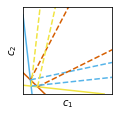

In [53]:
d=0.1;
a11=1; a12=1; a21=1; a22=1; a31=1; a32=1;
r31=0.1; r32=0.9; r21=0.9;  r22=0.1; r11=0.37;  r12=0.37; 

n1x = np.linspace(0,d/r11,10); n1y=np.linspace(d/r12,0,10);
n2x = np.linspace(0,d/r21,10); n2y=np.linspace(d/r22,0,10);
n3x = np.linspace(0,d/r31,10); n3y=np.linspace(d/r32,0,10);
x12 = d*(r22-r12)/(r11*r22-r12*r21); y12=d*(r11-r21)/(r11*r22-r12*r21);
c1x_12= np.linspace(x12,x12+20*a11*r11*np.abs(r22-r12),10); c1y_12= np.linspace(y12,y12+20*a12*r12*np.abs(r11-r21),10);
c2x_12= np.linspace(x12,x12+20*a21*r21*np.abs(r22-r12),10); c2y_12= np.linspace(y12,y12+20*a22*r22*np.abs(r11-r21),10);
x23 = d*(r32-r22)/(r21*r32-r22*r31); y23=d*(r21-r31)/(r21*r32-r22*r31);
c1x_23= np.linspace(x23,x23+20*a21*r21*np.abs(r32-r22),10); c1y_23= np.linspace(y23,y23+20*a22*r22*np.abs(r21-r31),10);
c2x_23= np.linspace(x23,x23+20*a31*r31*np.abs(r32-r22),10); c2y_23= np.linspace(y23,y23+20*a32*r32*np.abs(r21-r31),10);
x13 = d*(r32-r12)/(r11*r32-r12*r31); y13=d*(r11-r31)/(r11*r32-r12*r31);
c1x_13= np.linspace(x13,x13+20*a11*r11*np.abs(r32-r12),10); c1y_13= np.linspace(y13,y13+20*a12*r12*np.abs(r11-r31),10);
c2x_13= np.linspace(x13,x13+20*a31*r31*np.abs(r32-r12),10); c2y_13= np.linspace(y13,y13+20*a32*r32*np.abs(r11-r31),10);

fig, ax = plt.subplots( figsize=(1.6,1.6)  );
ax.plot(n1x,n1y,color='#D55E00')
ax.plot(n2x,n2y,color='#56B4E9')
ax.plot(n3x,n3y,color='#F0E442')
ax.plot(c1x_12,c1y_12,color='#D55E00', linestyle='--')
ax.plot(c2x_12,c2y_12,color='#56B4E9',linestyle='--')
ax.plot(c1x_13,c1y_13,color='#D55E00',linestyle='--')
ax.plot(c2x_13,c2y_13,'#F0E442',linestyle='--')
ax.plot(c1x_23,c1y_23,color='#56B4E9',linestyle='--')
ax.plot(c2x_23,c2y_23,'#F0E442',linestyle='--')

ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xticks([]); ax.set_yticks([]);

ax.set_xlabel('$c_{1}$');ax.set_ylabel('$c_{2}$')



Text(0, 0.5, '$c_{2}$')

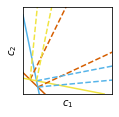

In [56]:
d=0.1;
a11=1; a12=1; a21=1; a22=1; a31=1; a32=1;
r31=0.1; r32=0.5; r21=0.5;  r22=0.1; r11=0.37;  r12=0.37; 

n1x = np.linspace(0,d/r11,10); n1y=np.linspace(d/r12,0,10);
n2x = np.linspace(0,d/r21,10); n2y=np.linspace(d/r22,0,10);
n3x = np.linspace(0,d/r31,10); n3y=np.linspace(d/r32,0,10);
x12 = d*(r22-r12)/(r11*r22-r12*r21); y12=d*(r11-r21)/(r11*r22-r12*r21);
c1x_12= np.linspace(x12,x12+20*a11*r11*np.abs(r22-r12),10); c1y_12= np.linspace(y12,y12+20*a12*r12*np.abs(r11-r21),10);
c2x_12= np.linspace(x12,x12+20*a21*r21*np.abs(r22-r12),10); c2y_12= np.linspace(y12,y12+20*a22*r22*np.abs(r11-r21),10);
x23 = d*(r32-r22)/(r21*r32-r22*r31); y23=d*(r21-r31)/(r21*r32-r22*r31);
c1x_23= np.linspace(x23,x23+20*a21*r21*np.abs(r32-r22),10); c1y_23= np.linspace(y23,y23+20*a22*r22*np.abs(r21-r31),10);
c2x_23= np.linspace(x23,x23+20*a31*r31*np.abs(r32-r22),10); c2y_23= np.linspace(y23,y23+20*a32*r32*np.abs(r21-r31),10);
x13 = d*(r32-r12)/(r11*r32-r12*r31); y13=d*(r11-r31)/(r11*r32-r12*r31);
c1x_13= np.linspace(x13,x13+20*a11*r11*np.abs(r32-r12),10); c1y_13= np.linspace(y13,y13+20*a12*r12*np.abs(r11-r31),10);
c2x_13= np.linspace(x13,x13+20*a31*r31*np.abs(r32-r12),10); c2y_13= np.linspace(y13,y13+20*a32*r32*np.abs(r11-r31),10);

fig, ax = plt.subplots( figsize=(1.6,1.6)  );
ax.plot(n1x,n1y,color='#D55E00')
ax.plot(n2x,n2y,color='#56B4E9')
ax.plot(n3x,n3y,color='#F0E442')
ax.plot(c1x_12,c1y_12,color='#D55E00', linestyle='--')
ax.plot(c2x_12,c2y_12,color='#56B4E9',linestyle='--')
ax.plot(c1x_13,c1y_13,color='#D55E00',linestyle='--')
ax.plot(c2x_13,c2y_13,'#F0E442',linestyle='--')
ax.plot(c1x_23,c1y_23,color='#56B4E9',linestyle='--')
ax.plot(c2x_23,c2y_23,'#F0E442',linestyle='--')

ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xticks([]); ax.set_yticks([]);

ax.set_xlabel('$c_{1}$');ax.set_ylabel('$c_{2}$')



## Fig. 2a

In [15]:
# phase diagram and trajectory

In [3]:
d=0.1;
a11=1;  a12=1; a21=1;  a22=1; a31=1;  a32=1;
# working example
r11=0.4; r12=0.2; r21=0.21;  r22=0.1; r31=0.1;  r32=0.5; c10 = 0.65; c20=0.85; # for main text fig
# violation 1
#r31=0.1; r32=1; r11=1;  r12=0.1; r21=0.2;  r22=0.2; a31=1;  a32=10; a11=10;  a12=1; a21=10;  a22=1; c10 = 0.6; c20=0.95; # for violation
#c10 = 0.6; c20=0.6;
# violation 2
#r31=0.1; r32=0.48; r21=0.48;  r22=0.1; r11=0.2;  r12=0.2; c10 = 0.95; c20=0.95; 
#c10 = 0.65; c20=0.65;
#r31=0.1; r32=0.8; r11=0.8;  r12=0.1; r21=0.2;  r22=0.2; 
#a31=1;  a32=3; a11=1.2;  a12=1; a21=7;  a22=1; c10 = 0.6; c20=0.95; # for violation

R12 = np.array([[ r11,r12 ],[r21,r22]]); RA12 = np.array([[ r11*a11,r12*a12 ],[r21*a21,r22*a22]]);
R23 = np.array([[ r21,r22 ],[r31,r32]]); RA23 = np.array([[ r21*a21,r22*a22 ],[r31*a31,r32*a32]]);
R13 = np.array([[ r11,r12 ],[r31,r32]]); RA13 = np.array([[ r11*a11,r12*a12 ],[r31*a31,r32*a32]]);
R123 = np.array([[ r11,r12 ],[ r21,r22 ],[r31,r32]]); RA123 = np.array([[ r11*a11,r12*a12 ],[ r21*a21,r22*a22 ],[r31*a31,r32*a32]]);
#plt.xlim(0,np.max([d/r11,d/r21,d/r31])); plt.ylim(0,np.max([d/r12,d/r22,d/r32]));
n1x = np.linspace(0,d/r11,10); n1y=np.linspace(d/r12,0,10);
n2x = np.linspace(0,d/r21,10); n2y=np.linspace(d/r22,0,10);
n3x = np.linspace(0,d/r31,10); n3y=np.linspace(d/r32,0,10);
x12 = d*(r22-r12)/(r11*r22-r12*r21); y12=d*(r11-r21)/(r11*r22-r12*r21);
c1x_12= np.linspace(x12,x12+20*a11*r11*np.abs(r22-r12),10); c1y_12= np.linspace(y12,y12+20*a12*r12*np.abs(r11-r21),10);
c2x_12= np.linspace(x12,x12+20*a21*r21*np.abs(r22-r12),10); c2y_12= np.linspace(y12,y12+20*a22*r22*np.abs(r11-r21),10);
x23 = d*(r32-r22)/(r21*r32-r22*r31); y23=d*(r21-r31)/(r21*r32-r22*r31);
c1x_23= np.linspace(x23,x23+20*a21*r21*np.abs(r32-r22),10); c1y_23= np.linspace(y23,y23+20*a22*r22*np.abs(r21-r31),10);
c2x_23= np.linspace(x23,x23+20*a31*r31*np.abs(r32-r22),10); c2y_23= np.linspace(y23,y23+20*a32*r32*np.abs(r21-r31),10);
x13 = d*(r32-r12)/(r11*r32-r12*r31); y13=d*(r11-r31)/(r11*r32-r12*r31);
c1x_13= np.linspace(x13,x13+20*a11*r11*np.abs(r32-r12),10); c1y_13= np.linspace(y13,y13+20*a12*r12*np.abs(r11-r31),10);
c2x_13= np.linspace(x13,x13+20*a31*r31*np.abs(r32-r12),10); c2y_13= np.linspace(y13,y13+20*a32*r32*np.abs(r11-r31),10);


traj1,c1=trajc12( 0.1,0.1,  c10,c20,d,R12,RA12 )
traj2,c2=trajc23( 0.1,0.1,  c10,c20,d,R23,RA23 )
traj3,c3=trajc13( 0.1,0.1,  c10,c20,d,R13,RA13 )
traj4,c4=trajc123( 0.01,0.01,0.01, c10,c20,d,R123,RA123 )
print("1 vs 2:",c1)
print("2 vs 3:",c2)
print("1 vs 3:",c3)
print("trio:",c4)

1 vs 2: (1.0000000000002354, -2.353672812205332e-13, 0)
2 vs 3: (0, 1.36692993566728e-09, 0.9999999986330701)
1 vs 3: (0.4952380892984053, 0, 0.5047619107015947)
trio: (0.495238094343615, 0, 0.5047619056563857)


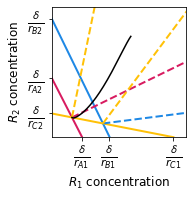

In [19]:
# violation 1

fig, ax = plt.subplots( figsize=(2.4,2.4)  );
ax.plot(n1x,n1y,color='#D81B60', linewidth=2)
ax.plot(n2x,n2y,color='#1E88E5', linewidth=2)
ax.plot(n3x,n3y,color='#FFC107', linewidth=2)
ax.plot(c1x_12,c1y_12,color='#D81B60', linestyle='--', linewidth=2)
ax.plot(c2x_12,c2y_12,color='#1E88E5',linestyle='--', linewidth=2)
ax.plot(c1x_13,c1y_13,color='#D81B60',linestyle='--', linewidth=2)
ax.plot(c2x_13,c2y_13,'#FFC107',linestyle='--', linewidth=2)
ax.plot(c1x_23,c1y_23,color='#1E88E5',linestyle='--', linewidth=2)
ax.plot(c2x_23,c2y_23,'#FFC107',linestyle='--', linewidth=2)

#ax.plot(traj1[:,2],traj1[:,3], color='k'); ax.set_xticks([0.25,0.5]); ax.set_yticks([0.5,1]); ax.set_xticklabels([r'$\frac{\mathcal{\delta}}{r_{A1}}$',r'$\frac{\mathcal{\delta}}{r_{B1}}$'], fontsize=16); ax.set_yticklabels([r'$\frac{\mathcal{\delta}}{r_{A2}}$',r'$\frac{\mathcal{\delta}}{r_{B2}}$'], fontsize=16);
#ax.plot(traj3[:,2],traj3[:,3], color='k');ax.set_xticks([0.25,1]); ax.set_yticks([0.5,0.2]); ax.set_xticklabels([r'$\frac{\mathcal{\delta}}{r_{A1}}$',r'$\frac{\mathcal{\delta}}{r_{C1}}$'], fontsize=16); ax.set_yticklabels([r'$\frac{\mathcal{\delta}}{r_{A2}}$',r'$\frac{\mathcal{\delta}}{r_{C2}}$'], fontsize=16);
#ax.plot(traj2[:,2],traj2[:,3], color='k');ax.set_xticks([0.47,1]); ax.set_yticks([1,0.2]); ax.set_xticklabels([r'$\frac{\mathcal{\delta}}{r_{B1}}$',r'$\frac{\mathcal{\delta}}{r_{C1}}$'], fontsize=16); ax.set_yticklabels([r'$\frac{\mathcal{\delta}}{r_{B2}}$',r'$\frac{\mathcal{\delta}}{r_{C2}}$'], fontsize=16);
ax.plot(traj4[:,3],traj4[:,4], color='k');ax.set_xticks([0.25,0.47,1]); ax.set_yticks([0.5,1,0.2]); ax.set_xticklabels([r'$\frac{\mathcal{\delta}}{r_{A1}}$',r'$\frac{\mathcal{\delta}}{r_{B1}}$',r'$\frac{\mathcal{\delta}}{r_{C1}}$'], fontsize=16); ax.set_yticklabels([r'$\frac{\mathcal{\delta}}{r_{A2}}$',r'$\frac{\mathcal{\delta}}{r_{B2}}$',r'$\frac{\mathcal{\delta}}{r_{C2}}$'], fontsize=16);
#ax.set_xticks([]); ax.set_yticks([]);
ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);


ax.set_xlabel('$R_1$ concentration', fontsize=12);ax.set_ylabel('$R_2$ concentration', fontsize=12)

fig.savefig('./fig_v1/3b4.pdf',bbox_inches='tight')

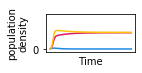

In [43]:
fig, ax = plt.subplots( figsize=(1.6,0.7)  );
tm=3000;
#ax.plot(traj1[:tm,0], color='#D81B60'); ax.plot(traj1[:tm,1], color='#1E88E5');
#ax.plot(traj3[:tm,0], color='#D81B60'); ax.plot(traj3[:tm,1], color='#FFC107');
#ax.plot(traj2[:tm,0], color='#1E88E5'); ax.plot(traj2[:tm,1], color='#FFC107');
ax.plot(traj4[:tm,0], color='#D81B60'); ax.plot(traj4[:tm,1], color='#1E88E5'); ax.plot(traj4[:tm,2], color='#FFC107');
ax.set_ylim(-0.1,1.25)
ax.set_xticks([]); ax.set_yticks([0])
#ax.set_yscale('log'); 
#ax.set_ylim(-0.1,1.3)
ax.set_xlabel('Time'); ax.set_ylabel('population\ndensity');
#fig.savefig('./fig_v1/3a8.pdf',bbox_inches='tight')

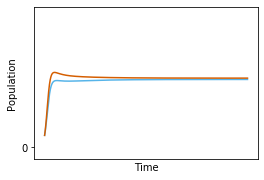

In [29]:
fig, ax = plt.subplots( figsize=(1.*4,0.7*4)  );
tm=3000;
#ax.plot(traj1[:tm,1], color='#D55E00'); ax.plot(traj1[:tm,0], color='#56B4E9');
#ax.plot(traj3[:tm,0], color='#D55E00'); ax.plot(traj3[:tm,1], color='#F0E442');
ax.plot(traj2[:tm,0], color='#56B4E9'); ax.plot(traj2[:tm,1], color='#D55E00');
#ax.plot(traj4[:tm,0], color='#D55E00'); ax.plot(traj4[:tm,1], color='#56B4E9'); ax.plot(traj4[:tm,2], color='#F0E442');
#ax.set_ylim(0,1.25)
ax.set_xticks([]); ax.set_yticks([0])
#ax.set_yscale('log'); 
ax.set_ylim(-1e-1,1.2)
ax.set_xlabel('Time'); ax.set_ylabel('Population');
#fig.savefig('./fig_v1/3a8.pdf',bbox_inches='tight')

## Fig. 3a.

In [21]:
survs = load_obj('210514_3sp3re');
lin = np.linspace(0,1,61);

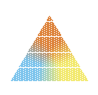

In [22]:
fig, ax = plt.subplots(figsize=(1.5,1.5));
for i1 in np.arange(61):
    for i2 in np.arange(61-i1):
        i3 = 60 - i1 - i2;  
        iy = lin[i1]*(3**0.5);
        ix = (lin[i3]-lin[i2])
        ax.scatter( ix, iy, color=cb(survs[i1,i2][0][3]), s=0.1  )
ax.set_xlim(-1.1,1.1);
ax.set_ylim(-0.2,2.);
#ax.set_xticks([]); ax.set_yticks([]);
plt.gca().set_axis_off()
#fig.savefig('fig_v1/3b4.pdf',bbox_inches='tight')

# similar 3 figures for pairwise outcomes 

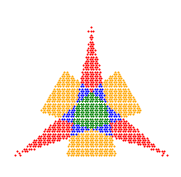

In [24]:
fig, ax = plt.subplots(figsize=(3,3));
colors = ['w','white','w','w','w','w','green']
for i1 in np.arange(61):
    for i2 in np.arange(61-i1):
        i3 = 60 - i1 - i2;  
        iy = lin[i1]*(3**0.5);
        ix = (lin[i3]-lin[i2])
        typ = np.where( arule(survs[i1,i2])[0]!=0 )[0][0]
        shape='o'
        if(arule(survs[i1,i2])[1][0]>0):
            shape='x'
        ax.scatter( ix, iy, s=1, color=colors[typ], marker=shape  )
ax.set_xlim(-1.1,1.1);
ax.set_ylim(-0.2,2.);
plt.gca().set_axis_off()
#plt.legend(['0','1'])
#fig.savefig('fig_v1/3c.pdf',bbox_inches='tight')

## Fig. 4-5

In [3]:
survs = load_obj('210514_survs_merged') #default
growths = load_obj('210514_growths_merged') #default

#survs = load_obj('210514_survs_merged') #tau=5 instead of tau=50
#growths = load_obj('210514_growths_merged') #tau=5 instead of tau=50


Ss = [3,5,7,10]#[3, 5, 7, 10];
Rs = [1,3,5,10,20,30,50]#[1, 3, 5, 7, 10];

nsurvs={};
nsurvs2={};
arules={};
gpreds={};
thress=np.ones(7)*1e-4;#[1e-2, 1e-3, 1e-4, 1e-5, 1e-5];
#thress[0] = 5e-1;
for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=thress[j];
        surv = survs[(S,R)]; growth=growths[(S,R)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; growth=growth[filt];
        nsurvs[(S,R)]=[];
        nsurvs2[(S,R)]=[];
        arules[(S,R)]=[];
        gpreds[(S,R)]=[];
        nsurv = np.sum(surv[:,-1,:]>thres, axis=1);
        nsurv2 = np.sum(surv[:,:-1,:]>thres, axis=(1,2))/(surv.shape[1]-1)-1 ;
        nsurvs[(S,R)] += list(nsurv);
        nsurvs2[(S,R)] += list(nsurv2);
        arules[(S,R)] += list(arule_m(surv, thres=thres));
        gpreds[(S,R)] += list(pred_growth(surv, growth, thres=thres) );
        #print(max(nsurv))

In [4]:
arule_aves = np.zeros((len(Ss),len(Rs)));
nsurv_aves = np.zeros((len(Ss),len(Rs)));
npair_aves = np.zeros((len(Ss),len(Rs)));
gpreds_aves = np.zeros((len(Ss),len(Rs)));
arule_stds = np.zeros((len(Ss),len(Rs)));
nsurv_stds = np.zeros((len(Ss),len(Rs)));
npair_stds = np.zeros((len(Ss),len(Rs)));
gpreds_stds = np.zeros((len(Ss),len(Rs)));
lens = np.zeros((len(Ss),len(Rs)));
for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j];
        key = (S,R);
        arule_aves[i,j] = np.average(arules[key]);
        nsurv_aves[i,j] = np.average(nsurvs[key]);
        npair_aves[i,j] = np.average(nsurvs2[key]);
        gpreds_aves[i,j] = np.average(gpreds[key]);
        arule_stds[i,j] = np.std(np.array(arules[key]));
        nsurv_stds[i,j] = np.std(np.array(nsurvs[key]));
        npair_stds[i,j] = np.std(np.array(nsurvs2[key]));
        gpreds_stds[i,j] = np.std(np.array(gpreds[key]));
        lens[i,j] = len( arules[key] )

In [9]:
print(arule_aves[3])

[1.         0.984      0.94545455 0.8146     0.61385542 0.5218
 0.5334    ]


[[203. 203.]
 [  0.   0.]
 [  3.   3.]
 [121. 121.]
 [ 60.  60.]
 [ 90.  80.]
 [ 23.   3.]]


Text(0, 0.5, 'Frequency (%)')

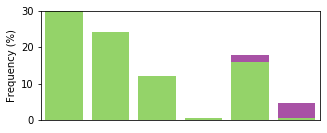

In [11]:
i=3;
surv = survs[(3,i)][filter_surv( survs[(3,i)] )];
growth = growths[(3,i)][filter_surv( survs[(3,i)] )];
#for i in Rs:
#    if(i!=1):
#        surv = np.concatenate([surv, survs[(3,i)][filter_surv( survs[(3,i)] )] ], axis=0)
outcome, viol = arule(surv, thres=thress[0]);
print(outcome)

fig, ax = plot_outcome3(outcome)
fig.set_size_inches(5, 2);
ax.set_ylim(0,150)
ax.set_yticks([0,50,100,150]);
ax.set_yticklabels([0,10,20,30])
ax.set_ylabel('Frequency (%)')
#plt.gca().set_axis_off()
#fig.savefig('fig_v1/3b.pdf', bbox_inches='tight')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x2b485be1ec8>)

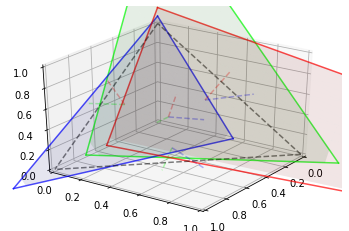

In [6]:
plot_zngi(growth[viol==4][0])

[[500. 500.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]]


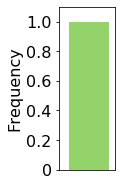

In [128]:
i=1;
surv = survs[(3,i)][filter_surv( survs[(3,i)] )];
#for i in Rs:
#    if(i!=1):
#        surv = np.concatenate([surv, survs[(3,i)][filter_surv( survs[(3,i)] )] ], axis=0)
outcome, viol = arule(surv, thres=thress[0]);
print(outcome)

fig, ax = plot_outcome3(outcome)
fig.set_size_inches(1, 3)
ax.set_ylim(0,550);
ax.set_yticks([]); ax.set_ylabel('')
ax.set_xlim(-0.6,0.5)
ax.set_yticks([0,100,200,300,400,500]);
ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0], fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
#plt.gca().set_axis_off()
fig.savefig('fig_v1/4c1.pdf', bbox_inches='tight')

In [30]:
print(arule_aves[0])

[1.         0.97466667 0.95733333 0.92666667 0.90133333 0.906
 0.956     ]


Text(0, 0.5, 'Trio assembly\nprediction agreement')

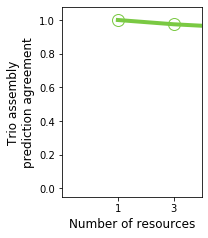

In [35]:
fig, ax = plt.subplots(figsize=(2.5,3.5))
ax.errorbar(Rs, arule_aves[0], yerr=arule_stds[0]/(500**0.5), marker='o', mfc='None', color='#7AC943', markersize=12, linewidth=4);
#ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]/(500**0.5), marker='o', mfc='None', markersize=6, color='blue', linestyle='--', alpha=0.8);
#ax.errorbar(Rs, nsurv_aves[0]/3, yerr=nsurv_stds[0]/(500**0.5)/3, marker='o', mfc='None', color='brown', markersize=6, linestyle='--', alpha=0.8);
ax.set_ylim(-0.05, 1.08)
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
ax.set_xticks([1,3,5,10,20,30,50]);
ax.set_xlim(-1,52);
ax.set_xlim(-1, 4)
#ax.text(19.,0.97,'Assembly Rule', color='green' )
#ax.text(28,0.55,'Fastest grower survives', color='blue', alpha=0.8)
#ax.text(4,0.35,'Everyone survives', color='brown' )
#ax.legend(['Assembly Rule','Fast grower wins'])
ax.set_xlabel('Number of resources', fontsize=12)
ax.set_ylabel('Trio assembly\nprediction agreement', fontsize=12)
#ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]);
#ax.set_xscale('log')
#fig.savefig('fig_v1/4e2.pdf', bbox_inches='tight')

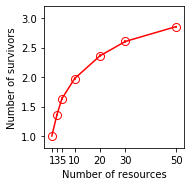

In [202]:
fig, ax = plt.subplots(figsize=(2.5,2.6))
#ax.errorbar(Rs[:-2], nsurv_aves[0,:-2], yerr=nsurv_stds[0,:-2]);
ax.errorbar(Rs, nsurv_aves[0], yerr=nsurv_stds[0]/(500**0.5), marker='o', mfc='None', color='#FF0000', markersize=8);
#ax.errorbar(Rs[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
ax.set_ylim(0.8, 3.2)
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
ax.set_xticks([1,3,5,10,20,30,50]); ax.set_xlim(-2,53);
#ax.text(9.5,0.97,'Assembly Rule', color='#FF0000' )
#ax.legend(['Assembly Rule','Fast grower wins'])
ax.set_xlabel('Number of resources')
ax.set_ylabel('Number of survivors')
#ax.plot(Rs, Rs, 'k--')
#ax.text(3.1,2.6,' Competitive\n exclusion\n bound', color='k' )
#ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]);
#ax.set_xscale('log')
fig.savefig('fig_v1/4d.pdf', bbox_inches='tight')

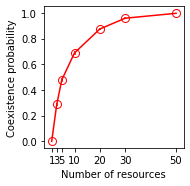

In [203]:
fig, ax = plt.subplots(figsize=(2.5,2.6))
#ax.errorbar(Rs[:-2], nsurv_aves[0,:-2], yerr=nsurv_stds[0,:-2]);
ax.errorbar(Rs, npair_aves[0], yerr=npair_stds[0]/(500**0.5), marker='o', mfc='None', color='#FF0000', markersize=8);
#ax.errorbar(Rs[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
ax.set_ylim(-0.05, 1.05)
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
ax.set_xticks([1,3,5,10,20,30,50]); ax.set_xlim(-2,53);
#ax.text(9.5,0.97,'Assembly Rule', color='#FF0000' )
#ax.text(11,0.6,'Fast grower\n           wins', color='orange' )
#ax.legend(['Assembly Rule','Fast grower wins'])
ax.set_xlabel('Number of resources')
ax.set_ylabel('Coexistence probability')
#ax.plot(Rs, Rs, 'k--')
#ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]);
#ax.set_xscale('log')
fig.savefig('fig_v1/4c.pdf', bbox_inches='tight')

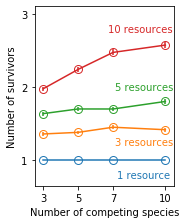

In [205]:
cd = pd.DataFrame(plt.rcParams["axes.prop_cycle"])
fig, ax = plt.subplots(figsize=(2.5,3.3))
for i in np.arange(4):
    ax.errorbar(Ss, nsurv_aves[:,i], yerr=nsurv_stds[:,i]/(500**0.5), marker='o', mfc='None', markersize=8);
#ax.legend(['1 resource','3 resources','5 resources','10 resources','20 resources']);#,'50 resources','100 resources'])
ax.set_xlabel('Number of competing species');
ax.set_ylabel('Number of survivors');
#ax.set_xticks([3,5,7,10]);
ax.set_yticks([1,2,3]);
#ax.set_xscale('log')
#ax.set_xticks([3,5,7,10,20,50]);
#ax.set_xticklabels([3,5,7,10,20,50]);
ax.set_ylim(0.65,3.1); ax.set_xticks([3,5,7,10]);
ax.set_xlim(2.5,10.5)
ax.text(7.2,0.75,'1 resource', color=cd['color'][0]);
ax.text(7.1,1.2,'3 resources', color=cd['color'][1]);
ax.text(7.1,1.95,'5 resources', color=cd['color'][2]);
ax.text(6.7,2.75,'10 resources', color=cd['color'][3]);
#ax.text(6.6,3.85,'20 resource', color=cd['color'][4]);
fig.savefig('fig_v1/5b.pdf', bbox_inches='tight')

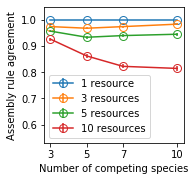

In [26]:
fig, ax = plt.subplots(figsize=(2.5,2.5))
for i in np.arange(4):
    ax.errorbar(Ss, arule_aves[:,i], yerr=arule_stds[:,i]/(500**0.5), marker='o', mfc='None', markersize=8);
#ax.errorbar(Ss[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
ax.set_ylim(0.53, 1.05)
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
ax.set_xticks([3,5,7,10]);
ax.set_xticklabels([3,5,7,10,20,50]);
ax.legend(['1 resource','3 resources','5 resources','10 resources','20 resources']);#,'50 resources','100 resources'])
ax.set_xlabel('Number of competing species')
ax.set_ylabel('Assembly rule agreement')
cd = pd.DataFrame(plt.rcParams["axes.prop_cycle"])
#ax.text(3.7,0.98,'1 resource', color=cd['color'][0]);
#ax.text(3.9,0.95,'3 resources', color=cd['color'][1]);
#ax.text(4.1,0.91,'5 resources', color=cd['color'][2]);
#ax.text(6.5,0.85,'10 resources', color=cd['color'][3]);
fig.savefig('fig_v1/5c.pdf', bbox_inches='tight')

In [11]:
print(arule_stds[:,3])

[0.1380821  0.17235498 0.17446338 0.18806073]


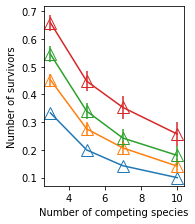

In [99]:
cd = pd.DataFrame(plt.rcParams["axes.prop_cycle"])
fig, ax = plt.subplots(figsize=(2.5,3.3))
for i in np.arange(4):
    ax.errorbar(Ss, nsurv_aves[:,i]/Ss, yerr=nsurv_stds[:,i]/(500**0.5), marker='^', mfc='None', markersize=12);
#ax.legend(['1 resource','3 resources','5 resources','10 resources','20 resources']);#,'50 resources','100 resources'])
ax.set_xlabel('Number of competing species');
ax.set_ylabel('Number of survivors');
#ax.set_xticks([3,5,7,10]);
#ax.set_yticks([1,2,3]);
#ax.set_xscale('log')
#ax.set_xticks([3,5,7,10,20,50]);
#ax.set_xticklabels([3,5,7,10,20,50]);
#ax.set_ylim(0.65,3.1); ax.set_xticks([3,5,7,10]);
#ax.set_xlim(2.5,10.5)
#ax.text(7.2,0.75,'1 resource', color=cd['color'][0]);
#ax.text(7.1,1.2,'3 resources', color=cd['color'][1]);
#ax.text(7.1,1.95,'5 resources', color=cd['color'][2]);
#ax.text(6.7,2.75,'10 resources', color=cd['color'][3]);
#ax.text(6.6,3.85,'20 resource', color=cd['color'][4]);
#fig.savefig('fig_v1/5b.pdf', bbox_inches='tight')

Text(0, 0.5, 'Prediction accuracy')

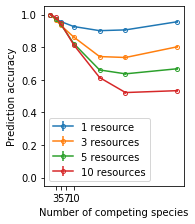

In [88]:
fig, ax = plt.subplots(figsize=(2.5,3.3))
for i in np.arange(4):
    ax.errorbar(Rs, arule_aves[i], yerr=arule_stds[i]/(500**0.5), marker='o', mfc='None', markersize=4);
#ax.errorbar(Ss[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
ax.set_ylim(-0.05, 1.05)
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
ax.set_xticks([3,5,7,10]);
ax.set_xticklabels([3,5,7,10,20,50]);
ax.legend(['1 resource','3 resources','5 resources','10 resources','20 resources']);#,'50 resources','100 resources'])
ax.set_xlabel('Number of competing species')
ax.set_ylabel('Prediction accuracy')
#fig.savefig('fig_v1/5c.pdf', bbox_inches='tight')

Text(0, 0.5, 'Coexistence probability')

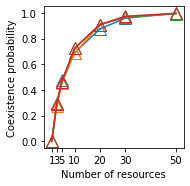

In [139]:
fig, ax = plt.subplots(figsize=(2.5,2.6))
#ax.errorbar(Rs[:-2], nsurv_aves[0,:-2], yerr=nsurv_stds[0,:-2]);
for i in np.arange(4):
    ax.errorbar(Rs, npair_aves[i], yerr=npair_stds[i]/(500**0.5), marker='^', mfc='None', markersize=12);
#ax.errorbar(Rs[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
ax.set_ylim(-0.05, 1.05)
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
ax.set_xticks([1,3,5,10,20,30,50]); ax.set_xlim(-2,53);
#ax.text(9.5,0.97,'Assembly Rule', color='#FF0000' )
#ax.text(11,0.6,'Fast grower\n           wins', color='orange' )
#ax.legend(['Assembly Rule','Fast grower wins'])
ax.set_xlabel('Number of resources')
ax.set_ylabel('Coexistence probability')
#ax.plot(Rs, Rs, 'k--')
#ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]);
#ax.set_xscale('log')
#fig.savefig('fig_v1/4c2.pdf', bbox_inches='tight')

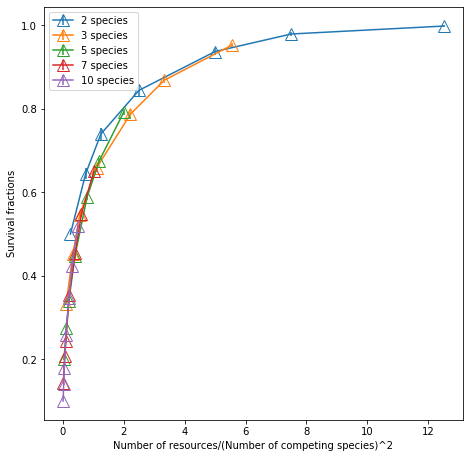

In [110]:
fig, ax = plt.subplots(figsize=(7.5,7.6))
#ax.errorbar(Rs[:-2], nsurv_aves[0,:-2], yerr=nsurv_stds[0,:-2]);
i=0;
ax.errorbar(np.array(Rs)/4, (npair_aves[i]+1)/2, yerr=npair_stds[i]/(500**0.5), marker='^', mfc='None', markersize=12);

for i in np.arange(4):
    ax.errorbar( np.array(Rs)/(Ss[i]**2), (nsurv_aves[i]/Ss[i]), yerr=(nsurv_stds[i]/Ss[i])/(500**0.5), marker='^', mfc='None', markersize=12);
    #ax.errorbar(Rs[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
#ax.set_ylim(0.8, 6.2)
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
#ax.set_xticks([1,3,5,10,20,30,50]); ax.set_xlim(-2,53);
#ax.text(9.5,0.97,'Assembly Rule', color='#FF0000' )
#ax.legend(['Assembly Rule','Fast grower wins'])
#xs = np.linspace(0.01, 13, 100);
#ys = xs/(1+xs);
#plt.plot(xs,ys, 'k--')

ax.set_xlabel('Number of resources/(Number of competing species)^2')
ax.set_ylabel('Survival fractions')
ax.legend(['2 species','3 species','5 species','7 species','10 species']);
#ax.plot(Rs, Rs, 'k--')
#ax.text(3.1,2.6,' Competitive\n exclusion\n bound', color='k' )
#ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]);
#ax.set_xscale('log')
#fig.savefig('fig_v1/4d2.pdf', bbox_inches='tight')

Text(0, 0.5, 'Survival fractions')

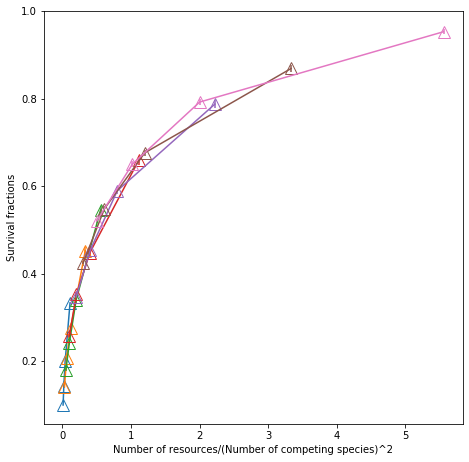

In [121]:
fig, ax = plt.subplots(figsize=(7.5,7.6))
#ax.errorbar(Rs[:-2], nsurv_aves[0,:-2], yerr=nsurv_stds[0,:-2]);
i=0;
#ax.errorbar(np.array(Rs)/4, (npair_aves[i]+1)/2, yerr=npair_stds[i]/(500**0.5), marker='^', mfc='None', markersize=12);

for i in np.arange(7):
    #if(i!=0): continue;
    ax.errorbar( np.array(Rs[i])/(np.array(Ss)**2), (nsurv_aves[:,i]/Ss), yerr=(nsurv_stds[:,i]/Ss)/(500**0.5), marker='^', mfc='None', markersize=12);
    #ax.errorbar(Rs[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
#ax.set_ylim(0.8, 6.2)
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
#ax.set_xticks([1,3,5,10,20,30,50]); ax.set_xlim(-2,53);
#ax.text(9.5,0.97,'Assembly Rule', color='#FF0000' )
#ax.legend(['Assembly Rule','Fast grower wins'])
#xs = np.linspace(0.01, 13, 100);
#ys = xs/(1+xs);
#plt.plot(xs,ys, 'k--')

ax.set_xlabel('Number of resources/(Number of competing species)^2')
ax.set_ylabel('Survival fractions')
#ax.legend(['1 resource','3 species','5 species','7 species','10 species']);
#ax.plot(Rs, Rs, 'k--')
#ax.text(3.1,2.6,' Competitive\n exclusion\n bound', color='k' )
#ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]);
#ax.set_xscale('log')
#fig.savefig('fig_v1/4d2.pdf', bbox_inches='tight')

In [171]:
g.swapaxes(0,2).swapaxes(1,2).shape

(1, 500, 3)

In [174]:
ri = np.zeros((4,7));
#aij = np.zeros((4,7,500));
mu = np.zeros((4,7));
sig = np.zeros((4,7));
for i in np.arange(4):
    for j in np.arange(7):
        g = np.array(growths[(Ss[i],Rs[j])]);
        ri[i,j] = np.average( np.std( np.average( g, axis=2 ), axis=1) )
        aij = np.tensordot(g, g.swapaxes(0,2).swapaxes(1,2), axes=1 )
        mu[i,j] = np.average(aij);
        sig[i,j] = np.average(np.std(aij, axis=1));

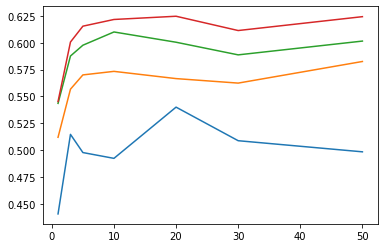

In [186]:
for i in np.arange(4):
    plt.plot(Rs, sig[i]/(np.array(Rs)**0.5))

## Fig. 6

In [2]:
#survs = load_obj('210830_survs_cf_3sp_dumi')
#growths = load_obj('210830_growths_cf_3sp_dumi')
#survs = load_obj('220331_survs_cf_3sp')
#growths = load_obj('220331_growths_cf_3sp')
survs = load_obj('220406_survs_cf_3sp_dumi')
growths = load_obj('220406_growths_cf_3sp_dumi')
S=3;
#ls = [0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9]; # 0.95 has some missing data
#ps = [0, 0.2, 0.4, 0.6, 0.8, 1.];
#ls = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.8];
ps = [0.5];
ls = [0., 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5];
nsurvs={};
nsurvs2={};
arules={};
gpreds={};
thress=np.ones(len(ls))*5e-5;#[1e-2, 1e-3, 1e-4, 1e-5, 1e-5];
#thress[0] = 5e-1;
for i in np.arange(len(ps)):
    for j in np.arange(len(ls)):
        p = ps[i]; l = ls[j]; thres=thress[j];
        surv = survs[(S,p,l)]; growth=growths[(S,p,l)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; growth=growth[filt];
        nsurvs[(S,p,l)]=[];
        nsurvs2[(S,p,l)]=[];
        arules[(S,p,l)]=[];
        gpreds[(S,p,l)]=[];
        nsurv = np.sum(surv[:,-1,:]>thres, axis=1);
        nsurv2 = np.sum(surv[:,:-1,:]>thres, axis=(1,2))/(surv.shape[1]-1)-1 ;
        nsurvs[(S,p,l)] += list(nsurv);
        nsurvs2[(S,p,l)] += list(nsurv2);
        arules[(S,p,l)] += list(arule_m(surv, thres=thres));
        gpreds[(S,p,l)] += list(pred_growth(surv, growth, thres=thres) );
        #print(max(nsurv))

In [3]:
arule_aves = np.zeros((len(ls),len(ps)));
nsurv_aves = np.zeros((len(ls),len(ps)));
npair_aves = np.zeros((len(ls),len(ps)));
gpreds_aves = np.zeros((len(ls),len(ps)));
arule_stds = np.zeros((len(ls),len(ps)));
nsurv_stds = np.zeros((len(ls),len(ps)));
npair_stds = np.zeros((len(ls),len(ps)));
gpreds_stds = np.zeros((len(ls),len(ps)));
lens = np.zeros((len(ls),len(ps)));
for i in np.arange(len(ls)):
    for j in np.arange(len(ps)):
        l = ls[i]; p = ps[j];
        key = (S,p,l);
        arule_aves[i,j] = np.average(arules[key]);
        nsurv_aves[i,j] = np.average(nsurvs[key]);
        npair_aves[i,j] = np.average(nsurvs2[key]);
        gpreds_aves[i,j] = np.average(gpreds[key]);
        arule_stds[i,j] = np.std(np.array(arules[key]));
        nsurv_stds[i,j] = np.std(np.array(nsurvs[key]));
        npair_stds[i,j] = np.std(np.array(nsurvs2[key]));
        gpreds_stds[i,j] = np.std(np.array(gpreds[key]));
        lens[i,j] = len( arules[key] )

In [4]:
print(arule_stds/(500**0.5))

[[0.        ]
 [0.00229008]
 [0.00381937]
 [0.00462688]
 [0.00538071]
 [0.00585598]
 [0.006021  ]
 [0.00624678]
 [0.00657429]
 [0.00616074]
 [0.00587658]]


C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


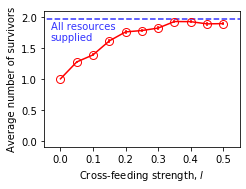

In [7]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
#ax.errorbar(Rs[:-2], nsurv_aves[0,:-2], yerr=nsurv_stds[0,:-2]);
ax.errorbar(ls, nsurv_aves, yerr=nsurv_stds/(500**0.5), marker='o', mfc='None', markersize=8, color='red');
nocf = 1.976;

#ax.errorbar(Rs[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
#ax.set_ylim(0.8, 3.2)
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
#ax.set_xticks([1,3,5,10,20,30,50]); ax.set_xlim(-2,53);
#ax.text(9.5,0.97,'Assembly Rule', color='#FF0000' )
#ax.legend(['Assembly Rule','Fast grower wins'])
ax.text(-0.03,nocf-0.35,'All resources\nsupplied', color='blue', alpha=0.8);
#ax.legend(['$l=0$','$l=0.1$','$l=0.2$','$l=0.3$','$l=0.4$','$l=0.5$'], loc=(0.65,0.07));
ax.set_xlabel('Cross-feeding strength, $l$')
ax.set_ylabel('Average number of survivors')
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5]);
ax.set_xlim(-0.05,0.55);
ax.set_ylim(-0.1,2.1);
ax.plot(np.linspace(-1,2,10), nocf+0*np.linspace(-1,2,10), color='blue', linestyle='--', alpha=0.8);

#ax.plot(Rs, Rs, 'k--')
#ax.text(3.1,2.6,' Competitive\n exclusion\n bound', color='k' )
#ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]);
#ax.set_xscale('log')
fig.savefig('fig_v1/6c.pdf', bbox_inches='tight')

(496, 4, 3)


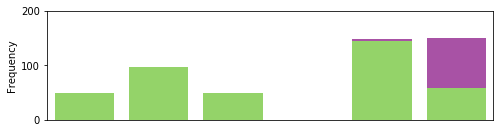

In [144]:
i=0.6; j=0.8;
surv = survs[(3,i,j)][filter_surv( survs[(3,i,j)] )];
print(surv.shape)
#for i in Rs:
#    if(i!=1):
#        surv = np.concatenate([surv, survs[(3,i)][filter_surv( survs[(3,i)] )] ], axis=0)
outcome, viol = arule(surv, thres=thress[0]);
fig, ax = plot_outcome3(outcome, figsize=(8,2))
#fig.savefig('fig_v1/6b09.pdf', bbox_inches='tight')

C:\Users\Hyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


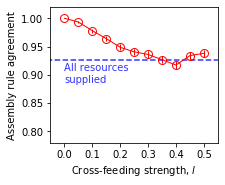

In [8]:
fig, ax = plt.subplots(figsize=(3.,2.5))
ax.errorbar(ls, arule_aves, yerr=arule_stds/(500**0.5), marker='o', mfc='None', linewidth=1, markersize=8, color='r');
#ax.errorbar([1,3,5,10], nocf_ave[:4], yerr= nocf_std[:4], marker='^', mfc='None', markersize=8)
nocf=0.92666667
    #ax.errorbar(Ss[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
ax.set_ylim(0.78, 1.02)
#ax.set_xlim(0.45,1)
#ax.set_xscale('log')
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5]);
ax.set_xlim(-0.05,0.55)
ax.set_yticks([0.8, 0.85, 0.9,0.95,1])
#ax.set_xticklabels([3,5,7,10,20,50]);
#ax.legend(['$l=0$','$l=0.1$','$l=0.2$','$l=0.3$','$l=0.4$','$l=0.5$'], ncol=2);
ax.set_xlabel('Cross-feeding strength, $l$')
ax.set_ylabel('Assembly rule agreement')
ax.plot(np.linspace(-1,2,10), nocf+0*np.linspace(-1,2,10), 'b--', alpha=0.8);
ax.text(0.0,nocf-0.04,'All resources\nsupplied', color='b', alpha=0.8);

fig.savefig('fig_v1/6d.pdf', bbox_inches='tight')

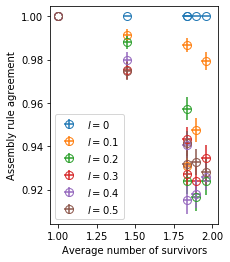

In [11]:
fig, ax = plt.subplots(figsize=(3.,4.))
for i in np.arange(len(ls)-1):
    ax.errorbar(nsurv_aves[j], arule_aves[i], xerr=nsurv_stds[j]/(500**0.5), yerr=arule_stds[i]/(500**0.5), marker='o', mfc='None', linestyle='None', markersize=8);
#ax.errorbar([1,3,5,10], nocf_ave[:4], yerr= nocf_std[:4], marker='^', mfc='None', markersize=8)
nocf=0.92666667
    #ax.errorbar(Ss[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
#ax.set_ylim(0.78, 1.02)
#ax.set_xlim(0.45,1)
#ax.set_xscale('log')
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
#ax.set_xticks(ps);
#ax.set_xlim(-0.05,1.05)
#ax.set_yticks([0.8, 0.85, 0.9,0.95,1])
#ax.set_xticklabels([3,5,7,10,20,50]);
ax.legend(['$l=0$','$l=0.1$','$l=0.2$','$l=0.3$','$l=0.4$','$l=0.5$']);
ax.set_xlabel('Average number of survivors')
ax.set_ylabel('Assembly rule agreement')
#ax.plot(np.linspace(-1,2,10), nocf+0*np.linspace(-1,2,10), 'k--');
#ax.text(0.0,nocf-0.027,'10 resources\nsupplied');
fig.savefig('fig_v1/6e.pdf', bbox_inches='tight')

## Supp Figs

### S1. Assembly Rule has worked well for laboratory experiments

In [113]:
# A. Jonathan's paper
# B. Clare's paper
# C. Simon's paper

Text(0, 0.5, 'Frequency (%)')

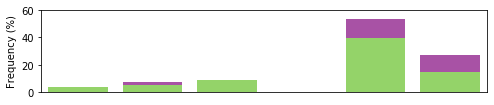

In [27]:
a = np.zeros((7,2));
a[0]=[2,2];
a[3]=[4,3];
a[4]=[5,5];
a[5]=[30, 22];
a[6]=[15,8];
fig, ax = plot_outcome3(a/np.sum(a[:,0]))
fig.set_size_inches(8, 1.5)
ax.set_ylim(0,0.6);
ax.set_yticks([0,0.2,0.4,0.6]);
ax.set_yticklabels([0,20,40,60]);
ax.set_ylabel('Frequency (%)')
#fig.savefig('fig_v1/s2a.pdf', bbox_inches='tight')

In [13]:
np.sum(a[:,0])

56.0

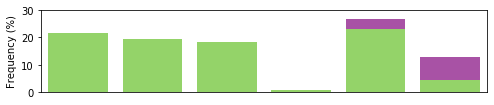

In [73]:
# diauxie simulation
a = np.zeros((7,2));
a[0]=[21.8,21.8];
a[3]=[19.6,19.6];
a[4]=[18.5,18.5];
a[2]=[0.6,0.6];
a[5]=[23.2+2.1+1.5, 23.2];
a[6]=[8.5+4.2,4.2];
fig, ax = plot_outcome3(a/100)
fig.set_size_inches(8, 1.5)
ax.set_ylim(0,0.3);
ax.set_yticks([0,0.1,0.2,0.3]);
ax.set_yticklabels([0,10,20,30]);
ax.set_ylabel('Frequency (%)')
fig.savefig('fig_v1/s6.pdf', bbox_inches='tight')

### Sx. Cross-feeding with 5 species also exhibits increase in A rule accuracy

In [208]:
survs = load_obj('210506_survs_cf_5sp')
growths = load_obj('210506_growths_cf_5sp')
S=5;
ls = [0.,0.7,0.8,0.9]; # 0.95 has some missing data
Rs = [3,5,7,10];
nsurvs={};
nsurvs2={};
arules={};
gpreds={};
thress=np.ones(7)*5e-5;#[1e-2, 1e-3, 1e-4, 1e-5, 1e-5];
#thress[0] = 5e-1;
for i in np.arange(len(ls)):
    for j in np.arange(len(Rs)):
        l = ls[i]; R = Rs[j]; thres=thress[j];
        surv = survs[(S,R,l)]; growth=growths[(S,R,l)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; growth=growth[filt];
        nsurvs[(S,R,l)]=[];
        nsurvs2[(S,R,l)]=[];
        arules[(S,R,l)]=[];
        gpreds[(S,R,l)]=[];
        nsurv = np.sum(surv[:,-1,:]>thres, axis=1);
        nsurv2 = np.sum(surv[:,:-1,:]>thres, axis=(1,2))/(surv.shape[1]-1)-1 ;
        nsurvs[(S,R,l)] += list(nsurv);
        nsurvs2[(S,R,l)] += list(nsurv2);
        arules[(S,R,l)] += list(arule_m(surv, thres=thres));
        gpreds[(S,R,l)] += list(pred_growth(surv, growth, thres=thres) );
        #print(max(nsurv))

In [209]:
arule_aves = np.zeros((len(ls),len(Rs)));
nsurv_aves = np.zeros((len(ls),len(Rs)));
npair_aves = np.zeros((len(ls),len(Rs)));
gpreds_aves = np.zeros((len(ls),len(Rs)));
arule_stds = np.zeros((len(ls),len(Rs)));
nsurv_stds = np.zeros((len(ls),len(Rs)));
npair_stds = np.zeros((len(ls),len(Rs)));
gpreds_stds = np.zeros((len(ls),len(Rs)));
lens = np.zeros((len(ls),len(Rs)));
for i in np.arange(len(ls)):
    for j in np.arange(len(Rs)):
        l = ls[i]; R = Rs[j];
        key = (S,R,l);
        arule_aves[i,j] = np.average(arules[key]);
        nsurv_aves[i,j] = np.average(nsurvs[key]);
        npair_aves[i,j] = np.average(nsurvs2[key]);
        gpreds_aves[i,j] = np.average(gpreds[key]);
        arule_stds[i,j] = np.std(np.array(arules[key]));
        nsurv_stds[i,j] = np.std(np.array(nsurvs[key]));
        npair_stds[i,j] = np.std(np.array(nsurvs2[key]));
        gpreds_stds[i,j] = np.std(np.array(gpreds[key]));
        lens[i,j] = len( arules[key] )

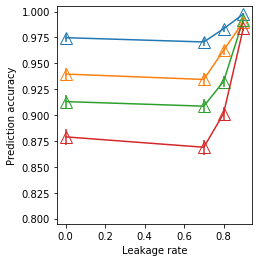

In [211]:
fig, ax = plt.subplots(figsize=(3.5,4))
for i in np.arange(4):
    ax.errorbar(ls, arule_aves[:,i], yerr=arule_stds[:,i]/(500**0.5), marker='^', mfc='None', markersize=12);
#ax.errorbar(Ss[:-2], gpreds_aves[0,:-2], yerr=gpreds_stds[0,:-2]/(500**0.5), marker='o', mfc='None', markersize=8, color='orange', linestyle='--');
ax.set_ylim(0.795, 1.005)
#ax.set_xlim(0.45,1)
#ax.set_xscale('log')
#ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]);
#ax.set_xticks([3,5,7,10,20,50]);
#ax.set_xticklabels([3,5,7,10,20,50]);
#ax.legend(['3 resources','5 resources','7 resources','10 resources']);#,'50 resources','100 resources'])
ax.set_xlabel('Leakage rate')
ax.set_ylabel('Prediction accuracy')
fig.savefig('fig_v1/6ca.pdf', bbox_inches='tight')

In [30]:
threesp = pd.DataFrame();
numr=[];
nums=[];
pred = [];
gpred = [];
for i in Rs:
    nsurvi = nsurvs[(3,i)];
    arulei = arules[(3,i)];
    gpredi = gpreds[(3,i)];
    numr += [i]*len(nsurvi);
    nums += nsurvi;
    pred += arulei;
    gpred += gpredi;
threesp['Number of resources']=numr;
threesp['Survivors']=nums;
threesp['Prediction accuracy']=pred;
threesp['Fastest wins rule']=gpred;

Text(0, 0.5, 'Count')

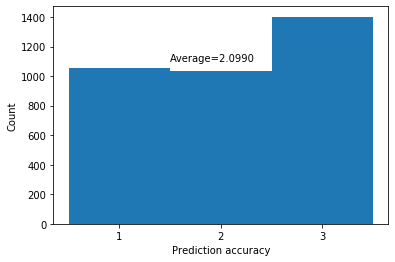

In [31]:
fig, ax = plt.subplots()
ax.hist(nums, bins = [0.5, 1.5, 2.5, 3.5])
#ax.plot( np.average(pred)*np.ones(10), np.linspace(0, 1200, 10) )
ax.text( 1.5, 1100, 'Average='+str(np.average(nums))[:6] )
ax.set_xticks([1, 2, 3])
ax.set_xlabel('Prediction accuracy')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

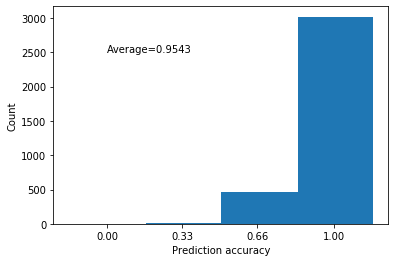

In [32]:
fig, ax = plt.subplots()
ax.hist(pred, bins = [-0.17, 0.17, 0.5, 0.84, 1.17])
#ax.plot( np.average(pred)*np.ones(10), np.linspace(0, 1200, 10) )
ax.text( 0, 2500, 'Average='+str(np.average(pred))[:6] )
ax.set_xticks([0, 0.33, 0.66, 1])
ax.set_xlabel('Prediction accuracy')
ax.set_ylabel('Count')

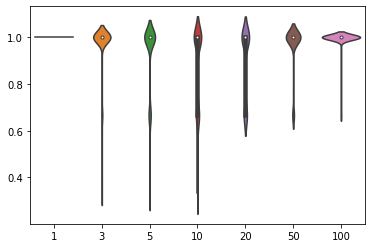

In [37]:
#fig, ax = plt.subplots()
#ax.hist(pred, bins = [-0.17, 0.17, 0.5, 0.84, 1.17])
##ax.plot( np.average(pred)*np.ones(10), np.linspace(0, 1200, 10) )
#ax.text( 0, 2500, 'Average='+str(np.average(pred))[:6] )
#ax.set_xticks([0, 0.33, 0.66, 1])
#ax.set_xlabel('Prediction accuracy')
#ax.set_ylabel('Count')
sns.violinplot(numr, pred)

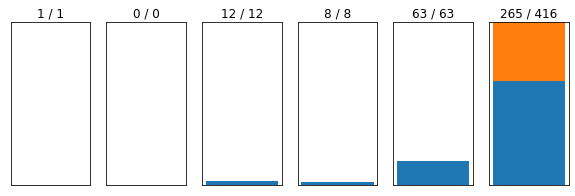

In [30]:
i=20;
surv = survs[(3,i)][filter_surv( survs[(3,i)] )]
outcome, viol = arule(surv, thres=thress[0]);
fig, ax = plot_outcome2(outcome)

# Simulation debug

In [80]:
survs = load_obj('210506_survs_cf_3sp')
growths = load_obj('210506_growths_cf_3sp')
S=3;
ls = [0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9]; # 0.95 has some missing data
Rs = [3,5,7,10];
nsurvs={};
nsurvs2={};
arules={};
gpreds={};
thress=np.ones(7)*5e-5;#[1e-2, 1e-3, 1e-4, 1e-5, 1e-5];
#thress[0] = 5e-1;
for i in np.arange(len(ls)):
    for j in np.arange(len(Rs)):
        l = ls[i]; R = Rs[j]; thres=thress[j];
        surv = survs[(S,R,l)]; growth=growths[(S,R,l)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; growth=growth[filt];
        nsurvs[(S,R,l)]=[];
        nsurvs2[(S,R,l)]=[];
        arules[(S,R,l)]=[];
        gpreds[(S,R,l)]=[];
        nsurv = np.sum(surv[:,-1,:]>thres, axis=1);
        nsurv2 = np.sum(surv[:,:-1,:]>thres, axis=(1,2))/(surv.shape[1]-1)-1 ;
        nsurvs[(S,R,l)] += list(nsurv);
        nsurvs2[(S,R,l)] += list(nsurv2);
        arules[(S,R,l)] += list(arule_m(surv, thres=thres));
        gpreds[(S,R,l)] += list(pred_growth(surv, growth, thres=thres) );

In [82]:
arule_aves = np.zeros((len(ls),len(Rs)));
nsurv_aves = np.zeros((len(ls),len(Rs)));
npair_aves = np.zeros((len(ls),len(Rs)));
gpreds_aves = np.zeros((len(ls),len(Rs)));
arule_stds = np.zeros((len(ls),len(Rs)));
nsurv_stds = np.zeros((len(ls),len(Rs)));
npair_stds = np.zeros((len(ls),len(Rs)));
gpreds_stds = np.zeros((len(ls),len(Rs)));
lens = np.zeros((len(ls),len(Rs)));
for i in np.arange(len(ls)):
    for j in np.arange(len(Rs)):
        l = ls[i]; R = Rs[j];
        key = (S,R,l);
        arule_aves[i,j] = np.average(arules[key]);
        nsurv_aves[i,j] = np.average(nsurvs[key]);
        npair_aves[i,j] = np.average(nsurvs2[key]);
        gpreds_aves[i,j] = np.average(gpreds[key]);
        arule_stds[i,j] = np.std(np.array(arules[key]));
        nsurv_stds[i,j] = np.std(np.array(nsurvs[key]));
        npair_stds[i,j] = np.std(np.array(nsurvs2[key]));
        gpreds_stds[i,j] = np.std(np.array(gpreds[key]));
        lens[i,j] = len( arules[key] )

146 [[ True False False]
 [False False  True]
 [False False  True]
 [ True  True  True]]


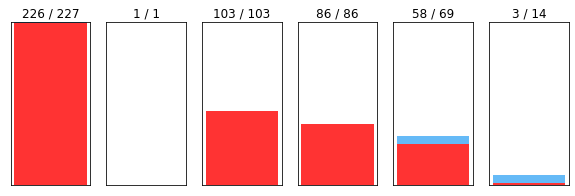

In [84]:
i=3;j=0.1
surv = survs[(3,i,j)][filter_surv( survs[(3,i,j)] )];
#for i in Rs:
#    if(i!=1):
#        surv = np.concatenate([surv, survs[(3,i)][filter_surv( survs[(3,i)] )] ], axis=0)
outcome, viol = arule(surv, thres=1e-4);
fig, ax = plot_outcome2(outcome)
#fig.savefig('fig_v1/4b.pdf', bbox_inches='tight')

In [87]:
growth = growths[(3,i,j)][filter_surv( survs[(3,i,j)] )][146]
print(growth)

In [86]:
survs[(3,i,j)][filter_surv( survs[(3,i,j)] )][146]

array([[9.99999830e-01, 1.69928990e-07, 0.00000000e+00],
       [1.90667164e-06, 0.00000000e+00, 9.99998093e-01],
       [0.00000000e+00, 1.97907666e-07, 9.99999802e-01],
       [2.50460651e-01, 7.74240381e-02, 6.72115311e-01]])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x21b15499e48>)

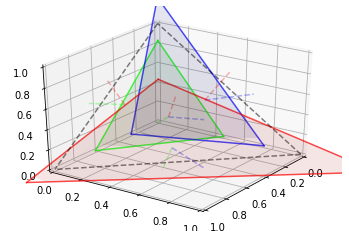

In [90]:
plot_zngi(growth, d=0.5)

In [32]:
survs = load_obj('210427_3sp3re_2')

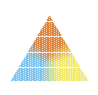

In [33]:
fig, ax = plt.subplots(figsize=(1.5,1.5));
for i1 in np.arange(61):
    for i2 in np.arange(61-i1):
        i3 = 60 - i1 - i2;  
        iy = lin[i1]*(3**0.5);
        ix = (lin[i3]-lin[i2])
        ax.scatter( ix, iy, color=cb(survs[i1,i2][0][3]), s=0.1  )
ax.set_xlim(-1.1,1.1);
ax.set_ylim(-0.2,2.);
#ax.set_xticks([]); ax.set_yticks([]);
plt.gca().set_axis_off()
fig.savefig('fig_v1/3b4_2.pdf',bbox_inches='tight')

# similar 3 figures for pairwise outcomes 

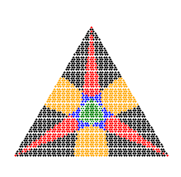

In [34]:
fig, ax = plt.subplots(figsize=(3,3));
colors = ['k','white','yellow','red','orange','blue','green']
for i1 in np.arange(61):
    for i2 in np.arange(61-i1):
        i3 = 60 - i1 - i2;  
        iy = lin[i1]*(3**0.5);
        ix = (lin[i3]-lin[i2])
        typ = np.where( arule(survs[i1,i2])[0]!=0 )[0][0]
        shape='o'
        if(arule(survs[i1,i2])[1][0]>0):
            shape='.'
        ax.scatter( ix, iy, s=1, color=colors[typ], marker=shape  )
ax.set_xlim(-1.1,1.1);
ax.set_ylim(-0.2,2.);
plt.gca().set_axis_off()
#plt.legend(['0','1'])
fig.savefig('fig_v1/3c_2.pdf',bbox_inches='tight')